In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

plt.style.use('seaborn-dark-palette')

In [2]:
deliveries = pd.read_csv('ipl_ball_by_ball_data.csv')

In [3]:
df = deliveries.copy()

In [4]:
df["batting_team"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)
df["bowling_team"].replace({"Delhi Daredevils": "Delhi Capitals"}, inplace=True)

In [5]:
def is_bowlers_wicket(player_dismissed, dismissal_kind):
    if type(player_dismissed) == str:
        if dismissal_kind not in [ 'run out', 'retired hurt', 'obstructing the field']:
            return 1
        else:
            return 0
    else:
        return 0

In [6]:
df['isBowlerWk'] = df.apply(lambda x: is_bowlers_wicket(x['player_dismissed'], x['wicket_type']), axis = 1)

In [7]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isBowlerWk
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200658,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.3,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
200659,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.2,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
200660,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.1,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
200661,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,8.4,Sunrisers Hyderabad,Rajasthan Royals,KS Williamson,V Shankar,C Sakariya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Bowling analysis

In [8]:
def Bowling_SR(balls,wicket):
    if wicket<1:
        return balls/1
    else:
        return balls/wicket 
    
def Bowling_AVG(runs_conceded, wicket):
    if wicket>0:
        return runs_conceded/wicket
    else:
        return runs_conceded/1
    
def Eco_rate(runs_conceded, balls):
    return runs_conceded/balls

def Balls_per_boundary(balls, boundaries):
    if boundaries < 1:
        return balls/1
    else:
        return balls/boundaries 
        
def Wicket_per_innings(wicket, innings):
    return wicket/innings


In [9]:
df = df.fillna(0)

In [10]:
def Total_runs(runs_off_bat,wides,noballs):
    return runs_off_bat + wides + noballs

In [11]:
df['total_runs'] = df.apply(lambda x: Total_runs(x['runs_off_bat'], x['wides'], x['noballs']), axis = 1)

In [45]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isBowlerWk,total_runs,Phases
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,0,0.0,Powerplay
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,2.0,Powerplay
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,1.0,Powerplay
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,Powerplay
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,0,0.0,Powerplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200658,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.3,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,0,1,1.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,1.0,Powerplay
200659,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.2,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,6,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,6.0,Powerplay
200660,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,4.1,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,JM Bairstow,Kartik Tyagi,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,Powerplay
200661,1254085,2021,2021-05-02,"Arun Jaitley Stadium, Delhi",2,8.4,Sunrisers Hyderabad,Rajasthan Royals,KS Williamson,V Shankar,C Sakariya,1,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,1.0,Middle


In [17]:
def Bowlerstats_venue(df, Venue):
    df = df[df.venue == Venue]
    
    df['isDot'] = df['total_runs'].apply(lambda x : 1 if x == 0 else 0)
    df['isOne'] = df['total_runs'].apply(lambda x : 1 if x == 1 else 0)
    df['isTwo'] = df['total_runs'].apply(lambda x : 1 if x == 2 else 0)
    df['isThree'] = df['total_runs'].apply(lambda x : 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x : 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x : 1 if x == 6 else 0)
 
    
    runs  = df.groupby(['bowler','venue','Phases'])['total_runs'].sum().reset_index().rename(columns = {"total_runs": "runs_conceded"})
    balls = df.groupby(['bowler','venue','Phases'])['ball'].count().reset_index().rename(columns = {'ball':"balls"})
    dismissals = df.groupby(['bowler','venue','Phases'])['isBowlerWk'].sum().reset_index().rename(columns = {'isBowlerWk':'wicket'})
    innings = df.groupby(['bowler','venue','Phases'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index().rename(columns = {"match_id": "innings"})
    
    ones = df.groupby(['bowler','venue','Phases'])['isOne'].sum().reset_index().rename(columns = {'isOne':'ones'})
    twos = df.groupby(['bowler','venue','Phases'])['isTwo'].sum().reset_index().rename(columns = {'isTwo':'twos'})
    threes = df.groupby(['bowler','venue','Phases'])['isThree'].sum().reset_index().rename(columns = {'isThree':'threes'})
    fours = df.groupby(['bowler','venue','Phases'])['isFour'].sum().reset_index().rename(columns = {'isFour':'fours'})
    sixes = df.groupby(['bowler','venue','Phases'])['isSix'].sum().reset_index().rename(columns = {'isSix': 'six'})
    dots = df.groupby(['bowler','venue','Phases'])['isDot'].sum().reset_index().rename(columns = {"isDot":"dots"})
    
    df = pd.merge(innings,runs, on = ['bowler','venue','Phases']).merge(balls, on = ['bowler','venue','Phases']).merge(dismissals, on = ['bowler','venue','Phases']).merge(dots, on = ['bowler','venue','Phases']).merge(ones, on = ['bowler','venue','Phases']).merge(twos, on = ['bowler','venue','Phases']).merge(threes, on = ['bowler','venue','Phases']).merge(fours, on = ['bowler','venue','Phases']).merge(sixes, on = ['bowler','venue','Phases'])
    
    df['Dot%'] = df.apply(lambda x: (100*x['dots']/x['balls']), axis = 1)
    df['Bowling_SR'] = df.apply(lambda x: Bowling_SR(x['balls'], x['wicket']), axis = 1)
    df['Bowling_AVG'] = df.apply(lambda x: Bowling_AVG(x['runs_conceded'], x['wicket']), axis = 1)
    df['Eco_rate'] = df.apply(lambda x: 6*Eco_rate(x['runs_conceded'], x['balls']), axis = 1)
    df['BPB'] = df.apply(lambda x: Balls_per_boundary(x['balls'], x['fours'] + x['six']), axis =1)
    df['WPI'] = df.apply(lambda x: Wicket_per_innings(x['wicket'], x['innings']), axis = 1)
    
    return df

In [18]:
Dubai = Bowlerstats_venue(df,'Dubai International Cricket Stadium')
Dubai.sort_values(by = 'wicket', ascending = False)

,bowler,venue,Phases,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
280,YS Chahal,Dubai International Cricket Stadium,Middle,9,177.0,179,12,59,93,15,0,9,3,32.960894,14.916667,14.750000,5.932961,14.916667,1.333333
212,Rashid Khan,Dubai International Cricket Stadium,Middle,8,138.0,185,11,91,74,13,0,2,5,49.189189,16.818182,12.545455,4.475676,26.428571,1.375000
116,K Rabada,Dubai International Cricket Stadium,death,8,75.0,57,8,21,19,8,0,7,2,36.842105,7.125000,9.375000,7.894737,6.333333,1.000000
214,Ravi Bishnoi,Dubai International Cricket Stadium,Middle,7,139.0,132,8,56,57,3,0,10,6,42.424242,16.500000,17.375000,6.318182,8.250000,1.142857
197,R Ashwin,Dubai International Cricket Stadium,Powerplay,10,73.0,79,7,40,27,4,0,5,3,50.632911,11.285714,10.428571,5.544304,9.875000,0.700000
254,T Natarajan,Dubai International Cricket Stadium,death,8,114.0,66,7,19,26,4,0,11,6,28.787879,9.428571,16.285714,10.363636,3.882353,0.875000
244,Sandeep Sharma,Dubai International Cricket Stadium,Powerplay,8,133.0,126,7,59,40,9,1,15,2,46.825397,18.000000,19.000000,6.333333,7.411765,0.875000
207,RA Jadeja,Dubai International Cricket Stadium,Middle,9,179.0,144,7,46,64,15,1,13,5,31.944444,20.571429,25.571429,7.458333,8.000000,0.777778
97,JJ Bumrah,Dubai International Cricket Stadium,Middle,6,49.0,61,6,30,23,4,0,3,1,49.180328,10.166667,8.166667,4.819672,15.250000,1.000000
256,TA Boult,Dubai International Cricket Stadium,Powerplay,5,115.0,82,6,41,17,3,0,17,4,50.000000,13.666667,19.166667,8.414634,3.904762,1.200000


In [19]:
Sharjah = Bowlerstats_venue(df, 'Sharjah Cricket Stadium')
Sharjah.sort_values(by = 'wicket', ascending = False)

,bowler,venue,Phases,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
237,YS Chahal,Sharjah Cricket Stadium,Middle,5,86.0,97,6,40,46,5,0,1,3,41.237113,16.166667,14.333333,5.319588,24.250000,1.200000
141,Mohammed Shami,Sharjah Cricket Stadium,death,5,92.0,38,6,10,12,2,0,4,10,26.315789,6.333333,15.333333,14.526316,2.714286,1.200000
208,Sandeep Sharma,Sharjah Cricket Stadium,Powerplay,4,70.0,61,5,32,16,3,0,6,4,52.459016,12.200000,14.000000,6.885246,6.100000,1.250000
85,JO Holder,Sharjah Cricket Stadium,death,2,18.0,18,4,7,8,2,0,0,1,38.888889,4.500000,4.500000,6.000000,18.000000,2.000000
189,S Nadeem,Sharjah Cricket Stadium,Middle,4,63.0,69,4,23,38,4,1,2,1,33.333333,17.250000,15.750000,5.478261,23.000000,1.000000
13,AR Patel,Sharjah Cricket Stadium,Middle,4,64.0,72,4,30,34,1,2,4,1,41.666667,18.000000,16.000000,5.333333,14.400000,1.000000
197,SM Curran,Sharjah Cricket Stadium,death,2,31.0,25,4,10,9,2,0,3,1,40.000000,6.250000,7.750000,7.440000,6.250000,2.000000
217,TA Boult,Sharjah Cricket Stadium,Powerplay,2,20.0,29,4,21,4,1,0,2,1,72.413793,7.250000,5.000000,4.137931,9.666667,2.000000
171,R Tewatia,Sharjah Cricket Stadium,Middle,3,76.0,55,4,18,28,1,0,1,7,32.727273,13.750000,19.000000,8.290909,6.875000,1.333333
37,DL Chahar,Sharjah Cricket Stadium,Powerplay,3,69.0,53,3,24,15,3,0,9,2,45.283019,17.666667,23.000000,7.811321,4.818182,1.000000


In [20]:
Abu_Dhabi = Bowlerstats_venue(df, 'Sheikh Zayed Stadium')
Abu_Dhabi

,bowler,venue,Phases,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
0,A Mishra,Sheikh Zayed Stadium,Middle,2,54.0,41,2,11,18,7,0,4,1,26.829268,20.500000,27.000000,7.902439,8.200000,1.000000
1,A Mishra,Sheikh Zayed Stadium,death,1,7.0,7,2,4,1,1,0,1,0,57.142857,3.500000,3.500000,6.000000,7.000000,2.000000
2,A Nehra,Sheikh Zayed Stadium,Powerplay,1,20.0,12,1,4,4,0,0,4,0,33.333333,12.000000,20.000000,10.000000,3.000000,1.000000
3,A Nehra,Sheikh Zayed Stadium,death,1,4.0,6,0,2,4,0,0,0,0,33.333333,6.000000,4.000000,4.000000,6.000000,0.000000
4,A Nortje,Sheikh Zayed Stadium,Middle,5,46.0,27,1,7,12,1,0,5,2,25.925926,27.000000,46.000000,10.222222,3.857143,0.200000
5,A Nortje,Sheikh Zayed Stadium,Powerplay,5,74.0,55,2,25,17,1,1,7,4,45.454545,27.500000,37.000000,8.072727,5.000000,0.400000
6,A Nortje,Sheikh Zayed Stadium,death,5,44.0,39,2,15,18,0,0,5,1,38.461538,19.500000,22.000000,6.769231,6.500000,0.400000
7,A Zampa,Sheikh Zayed Stadium,Middle,2,39.0,43,1,17,21,2,0,2,1,39.534884,43.000000,39.000000,5.441860,14.333333,0.500000
8,AB Dinda,Sheikh Zayed Stadium,Middle,1,8.0,12,0,7,3,1,1,0,0,58.333333,12.000000,8.000000,4.000000,12.000000,0.000000
9,AD Russell,Sheikh Zayed Stadium,Middle,2,25.0,13,0,5,3,1,0,2,2,38.461538,13.000000,25.000000,11.538462,3.250000,0.000000


In [21]:
UAE_bowling = pd.concat([Dubai,Sharjah,Abu_Dhabi])
UAE_bowling

,bowler,venue,Phases,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
0,A Mishra,Dubai International Cricket Stadium,Middle,3,70.0,60,0,16,34,5,0,2,3,26.666667,60.000000,70.000000,7.000000,12.000000,0.000000
1,A Mishra,Dubai International Cricket Stadium,death,2,45.0,14,0,1,3,4,0,1,5,7.142857,14.000000,45.000000,19.285714,2.333333,0.000000
2,A Nortje,Dubai International Cricket Stadium,Middle,7,66.0,46,5,22,11,1,1,8,3,47.826087,9.200000,13.200000,8.608696,4.181818,0.714286
3,A Nortje,Dubai International Cricket Stadium,Powerplay,8,103.0,77,2,37,17,5,0,16,2,48.051948,38.500000,51.500000,8.025974,4.277778,0.250000
4,A Nortje,Dubai International Cricket Stadium,death,7,77.0,58,4,20,26,1,1,7,3,34.482759,14.500000,19.250000,7.965517,5.800000,0.571429
5,A Zampa,Dubai International Cricket Stadium,Middle,1,26.0,18,1,3,12,1,0,0,2,16.666667,18.000000,26.000000,8.666667,9.000000,1.000000
6,A Zampa,Dubai International Cricket Stadium,death,1,27.0,6,0,0,0,1,1,1,3,0.000000,6.000000,27.000000,27.000000,1.500000,0.000000
7,AB Dinda,Dubai International Cricket Stadium,Middle,2,18.0,24,0,11,10,2,0,1,0,45.833333,24.000000,18.000000,4.500000,24.000000,0.000000
8,AB Dinda,Dubai International Cricket Stadium,Powerplay,1,9.0,6,1,3,1,0,0,2,0,50.000000,6.000000,9.000000,9.000000,3.000000,1.000000
9,AB Dinda,Dubai International Cricket Stadium,death,2,6.0,12,1,6,6,0,0,0,0,50.000000,12.000000,6.000000,3.000000,12.000000,0.500000


In [22]:
UAE_bowling.sort_values(by = 'wicket', ascending = False)

,bowler,venue,Phases,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
280,YS Chahal,Dubai International Cricket Stadium,Middle,9,177.0,179,12,59,93,15,0,9,3,32.960894,14.916667,14.750000,5.932961,14.916667,1.333333
212,Rashid Khan,Dubai International Cricket Stadium,Middle,8,138.0,185,11,91,74,13,0,2,5,49.189189,16.818182,12.545455,4.475676,26.428571,1.375000
116,K Rabada,Dubai International Cricket Stadium,death,8,75.0,57,8,21,19,8,0,7,2,36.842105,7.125000,9.375000,7.894737,6.333333,1.000000
110,K Rabada,Sheikh Zayed Stadium,death,5,63.0,50,8,23,15,4,0,4,4,46.000000,6.250000,7.875000,7.560000,6.250000,1.600000
44,CV Varun,Sheikh Zayed Stadium,Middle,7,130.0,132,8,46,64,12,0,9,1,34.848485,16.500000,16.250000,5.909091,13.200000,1.142857
235,SP Narine,Sheikh Zayed Stadium,death,6,54.0,56,8,29,14,6,0,7,0,51.785714,7.000000,6.750000,5.785714,8.000000,1.333333
214,Ravi Bishnoi,Dubai International Cricket Stadium,Middle,7,139.0,132,8,56,57,3,0,10,6,42.424242,16.500000,17.375000,6.318182,8.250000,1.142857
197,R Ashwin,Dubai International Cricket Stadium,Powerplay,10,73.0,79,7,40,27,4,0,5,3,50.632911,11.285714,10.428571,5.544304,9.875000,0.700000
244,Sandeep Sharma,Dubai International Cricket Stadium,Powerplay,8,133.0,126,7,59,40,9,1,15,2,46.825397,18.000000,19.000000,6.333333,7.411765,0.875000
205,RD Chahar,Sheikh Zayed Stadium,Middle,8,217.0,166,7,49,80,13,1,15,8,29.518072,23.714286,31.000000,7.843373,7.217391,0.875000


### Indian wc bowling analysis 

In [27]:
## Analysing bowlers choosen for world cup

Axar = UAE_bowling[UAE_bowling.bowler == 'AR Patel'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})
Axar

Ashwin = UAE_bowling[UAE_bowling.bowler == 'R Ashwin'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})
Ashwin

Jadeja = UAE_bowling[UAE_bowling.bowler == 'RA Jadeja'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})
Jadeja

RChahar = UAE_bowling[UAE_bowling.bowler == 'RD Chahar'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})
RChahar

Varun = UAE_bowling[UAE_bowling.bowler == 'CV Varun'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})
Varun

Bumrah = UAE_bowling[UAE_bowling.bowler == 'JJ Bumrah'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})
Bumrah

Shami = UAE_bowling[UAE_bowling.bowler == 'Mohammed Shami'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})
Shami

Bhuvi = UAE_bowling[UAE_bowling.bowler == 'B Kumar'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})
Bhuvi

Dchahar = UAE_bowling[UAE_bowling.bowler == 'DL Chahar'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})

Thakur = UAE_bowling[UAE_bowling.bowler == 'SN Thakur'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})

chahal = UAE_bowling[UAE_bowling.bowler == 'YS Chahal'].rename(columns = {'runs_conceded':'Runs Given', 'balls':'Balls','wicket':'Wickets','dots':'Dots','fours':'Fours','six':'Sixes'})
# Shift + M for merging cells

In [28]:
WC_squad_bowlers = pd.concat([Axar, Ashwin, Jadeja, RChahar, Varun, Bumrah, Shami, Bhuvi, Dchahar, Thakur, chahal])
WC_squad_bowlers

,bowler,venue,Phases,innings,Runs Given,Balls,Wickets,Dots,ones,twos,threes,Fours,Sixes,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
10,AR Patel,Dubai International Cricket Stadium,Middle,9,144.0,144,3,51,75,6,1,6,5,35.416667,48.000000,48.000000,6.000000,13.090909,0.333333
11,AR Patel,Dubai International Cricket Stadium,Powerplay,6,46.0,41,3,14,20,2,0,4,1,34.146341,13.666667,15.333333,6.731707,8.200000,0.500000
12,AR Patel,Dubai International Cricket Stadium,death,3,9.0,14,0,9,3,1,0,1,0,64.285714,14.000000,9.000000,3.857143,14.000000,0.000000
13,AR Patel,Sharjah Cricket Stadium,Middle,4,64.0,72,4,30,34,1,2,4,1,41.666667,18.000000,16.000000,5.333333,14.400000,1.000000
14,AR Patel,Sharjah Cricket Stadium,Powerplay,2,9.0,12,0,6,5,0,0,1,0,50.000000,12.000000,9.000000,4.500000,12.000000,0.000000
12,AR Patel,Sheikh Zayed Stadium,Middle,6,130.0,111,4,32,59,7,1,9,3,28.828829,27.750000,32.500000,7.027027,9.250000,0.666667
13,AR Patel,Sheikh Zayed Stadium,Powerplay,3,28.0,25,1,11,7,4,0,2,0,44.000000,25.000000,28.000000,6.720000,12.500000,0.333333
196,R Ashwin,Dubai International Cricket Stadium,Middle,10,130.0,119,3,38,59,10,1,9,2,31.932773,39.666667,43.333333,6.554622,10.818182,0.300000
197,R Ashwin,Dubai International Cricket Stadium,Powerplay,10,73.0,79,7,40,27,4,0,5,3,50.632911,11.285714,10.428571,5.544304,9.875000,0.700000
198,R Ashwin,Dubai International Cricket Stadium,death,3,26.0,20,0,6,10,2,0,0,2,30.000000,20.000000,26.000000,7.800000,10.000000,0.000000


In [29]:
WC_squad_bowlers = WC_squad_bowlers.groupby(['bowler','venue','Phases'])['innings','Runs Given','Balls','Wickets','Dots','ones','threes','Fours','Sixes','Dot%','Bowling_SR','Bowling_AVG','Eco_rate','BPB','WPI'].sum()
WC_squad_bowlers

innings  \
bowler         venue                               Phases               
AR Patel       Dubai International Cricket Stadium Middle           9   
                                                   Powerplay        6   
                                                   death            3   
               Sharjah Cricket Stadium             Middle           4   
                                                   Powerplay        2   
               Sheikh Zayed Stadium                Middle           6   
                                                   Powerplay        3   
B Kumar        Dubai International Cricket Stadium Middle           2   
                                                   Powerplay        4   
                                                   death            4   
               Sharjah Cricket Stadium             Middle           2   
                                                   Powerplay        2   
                                                   death            2   
               Sheikh Zayed Stadium                Middle           3   
                                                   Powerplay        3   
                                                   death            2   
CV Varun       Dubai International Cricket Stadium Middle           3   
                                                   Powerplay        2   
                                                   death            1   
               Sharjah Cricket Stadium             Middle           3   
                                                   Powerplay        2   
                                                   death            1   
               Sheikh Zayed Stadium                Middle           7   
                                                   Powerplay        2   
                                                   death            5   
DL Chahar      Dubai International Cricket Stadium Middle           2   
                                                   Powerplay        7   
                                                   death            4   
               Sharjah Cricket Stadium             Middle           3   
                                                   Powerplay        3   
                                                   death            1   
               Sheikh Zayed Stadium                Middle           4   
                                                   Powerplay        4   
                                                   death            1   
JJ Bumrah      Dubai International Cricket Stadium Middle           6   
                                                   Powerplay        4   
                                                   death            5   
               Sharjah Cricket Stadium             Middle           2   
                                                   Powerplay        2   
                                                   death            2   
               Sheikh Zayed Stadium                Middle           8   
                                                   Powerplay        8   
                                                   death            8   
Mohammed Shami Dubai International Cricket Stadium Middle           7   
                                                   Powerplay        9   
                                                   death            6   
               Sharjah Cricket Stadium             Middle           3   
                                                   Powerplay        5   
                                                   death            5   
               Sheikh Zayed Stadium                Middle           3   
                                                   Powerplay        5   
                                                   death            5   
R Ashwin       Dubai International Cricket Stadium Middle          10   
                                               

In [30]:
WC_squad_bowlers['Runs Given'] = WC_squad_bowlers['Runs Given'].astype(int)
WC_squad_bowlers = WC_squad_bowlers[['innings','Runs Given','Balls','Wickets','Dots','ones','threes','Fours','Sixes','Dot%','Bowling_SR','Bowling_AVG','Eco_rate','BPB','WPI']].round(2)

In [31]:
WC_squad_bowlers

innings  \
bowler         venue                               Phases               
AR Patel       Dubai International Cricket Stadium Middle           9   
                                                   Powerplay        6   
                                                   death            3   
               Sharjah Cricket Stadium             Middle           4   
                                                   Powerplay        2   
               Sheikh Zayed Stadium                Middle           6   
                                                   Powerplay        3   
B Kumar        Dubai International Cricket Stadium Middle           2   
                                                   Powerplay        4   
                                                   death            4   
               Sharjah Cricket Stadium             Middle           2   
                                                   Powerplay        2   
                                                   death            2   
               Sheikh Zayed Stadium                Middle           3   
                                                   Powerplay        3   
                                                   death            2   
CV Varun       Dubai International Cricket Stadium Middle           3   
                                                   Powerplay        2   
                                                   death            1   
               Sharjah Cricket Stadium             Middle           3   
                                                   Powerplay        2   
                                                   death            1   
               Sheikh Zayed Stadium                Middle           7   
                                                   Powerplay        2   
                                                   death            5   
DL Chahar      Dubai International Cricket Stadium Middle           2   
                                                   Powerplay        7   
                                                   death            4   
               Sharjah Cricket Stadium             Middle           3   
                                                   Powerplay        3   
                                                   death            1   
               Sheikh Zayed Stadium                Middle           4   
                                                   Powerplay        4   
                                                   death            1   
JJ Bumrah      Dubai International Cricket Stadium Middle           6   
                                                   Powerplay        4   
                                                   death            5   
               Sharjah Cricket Stadium             Middle           2   
                                                   Powerplay        2   
                                                   death            2   
               Sheikh Zayed Stadium                Middle           8   
                                                   Powerplay        8   
                                                   death            8   
Mohammed Shami Dubai International Cricket Stadium Middle           7   
                                                   Powerplay        9   
                                                   death            6   
               Sharjah Cricket Stadium             Middle           3   
                                                   Powerplay        5   
                                                   death            5   
               Sheikh Zayed Stadium                Middle           3   
                                                   Powerplay        5   
                                                   death            5   
R Ashwin       Dubai International Cricket Stadium Middle          10   
                                               

In [49]:
Indian_WC = WC_squad_bowlers.to_excel('IndianWC.xls')

In [32]:
df1 = df[df['venue'].isin(['Dubai International Cricket Stadium','Sharjah Cricket Stadium','Sheikh Zayed Stadium'])]

## Head to head analysis 

In [33]:
df['isDot'] = df['total_runs'].apply(lambda x : 1 if x == 0 else 0)
df['isOne'] = df['total_runs'].apply(lambda x : 1 if x == 1 else 0)
df['isTwo'] = df['total_runs'].apply(lambda x : 1 if x == 2 else 0)
df['isThree'] = df['total_runs'].apply(lambda x : 1 if x == 3 else 0)
df['isFour'] = df['runs_off_bat'].apply(lambda x : 1 if x == 4 else 0)
df['isSix'] = df['runs_off_bat'].apply(lambda x : 1 if x == 6 else 0)

In [34]:
def Phases(ball):
    if ball < 5.6:
        return 'Powerplay'
    elif ball < 15.6:
        return 'Middle'
    else:
    
        return 'death'
        

In [35]:
df['Phases'] = df.apply(lambda x:Phases(x['ball']), axis = 1)

In [36]:
df2 = df.groupby(['striker','bowler','venue'])['runs_off_bat','isDot','isOne','isTwo','isThree','isFour','isSix','isBowlerWk'].sum()

In [37]:
df3 = df.groupby(['striker','bowler','venue'])['ball'].count()

In [38]:
df4 = df.groupby(['striker','bowler','venue'])['match_id'].apply(lambda x: len(list(np.unique(x))))

In [39]:
df5 = pd.merge(df4,df2, on = ['striker','bowler','venue']).merge(df3, on = ['striker','bowler','venue'])

In [40]:
df5 = df5.sort_values(by = 'runs_off_bat', ascending = False).reset_index()

### Individual batsman analysis

In [41]:
mask1 = df5.striker == 'V Kohli'

In [42]:
mask2 = df5.bowler == 'R Ashwin'

In [43]:
head_to_head = df5.loc[(mask1 & mask2)]
head_to_head

,striker,bowler,venue,match_id,runs_off_bat,isDot,isOne,isTwo,isThree,isFour,isSix,isBowlerWk,ball
1,V Kohli,R Ashwin,M Chinnaswamy Stadium,6,73,13,20,1,0,7,4,0,45
424,V Kohli,R Ashwin,"MA Chidambaram Stadium, Chepauk",4,30,11,12,2,0,2,1,0,28
2994,V Kohli,R Ashwin,Punjab Cricket Association IS Bindra Stadium,1,17,0,10,0,0,2,0,0,12
4345,V Kohli,R Ashwin,Wankhede Stadium,1,15,5,6,0,0,1,1,0,13
15663,V Kohli,R Ashwin,Maharashtra Cricket Association Stadium,1,6,4,7,0,0,0,0,0,12
16834,V Kohli,R Ashwin,M.Chinnaswamy Stadium,1,5,1,1,0,0,1,0,0,3
16852,V Kohli,R Ashwin,Dubai International Cricket Stadium,1,5,1,4,1,0,0,0,0,6
21746,V Kohli,R Ashwin,Sheikh Zayed Stadium,1,3,3,3,0,0,0,0,1,6
21986,V Kohli,R Ashwin,Holkar Cricket Stadium,1,3,0,3,0,0,0,0,0,3
21988,V Kohli,R Ashwin,JSCA International Stadium Complex,2,3,0,3,0,0,0,0,0,3


In [44]:
mask3 = df5.striker == 'Q de Kock'
mask4 = df5.bowler == 'MM Ali'

In [45]:
head_to_head1 = df5.loc[(mask3 & mask4)]
head_to_head1

,striker,bowler,venue,match_id,runs_off_bat,isDot,isOne,isTwo,isThree,isFour,isSix,isBowlerWk,ball
33401,Q de Kock,MM Ali,Wankhede Stadium,1,0,2,0,0,0,0,0,1,2
33534,Q de Kock,MM Ali,"Arun Jaitley Stadium, Delhi",1,0,2,0,0,0,0,0,1,2


In [46]:
## Dubai Head to head analysis 

In [47]:
Dubai_head_head = df5[df5.venue == 'Dubai International Cricket Stadium'].head(15)
Dubai_head_head = Dubai_head_head[['striker','bowler','runs_off_bat','ball','isDot','isFour','isSix','isBowlerWk']]
Dubai_head_head

,striker,bowler,runs_off_bat,ball,isDot,isFour,isSix,isBowlerWk
22,DA Warner,Mohammed Shami,53,31,9,6,2,0
46,KL Rahul,DW Steyn,48,19,4,4,4,0
50,KA Pollard,A Mishra,47,19,4,2,5,0
76,AB de Villiers,JJ Bumrah,44,20,6,3,4,0
81,Ishan Kishan,K Rabada,44,22,4,5,2,0
111,MK Pandey,Kartik Tyagi,41,22,8,4,3,0
155,Ishan Kishan,NA Saini,38,22,7,1,4,0
166,MK Pandey,R Tewatia,38,28,8,1,3,0
213,MP Stoinis,CJ Jordan,36,10,0,4,3,0
227,Ishan Kishan,A Nortje,35,14,2,4,2,0


In [48]:
Dubai_head_head1 = df5[df5.venue == 'Dubai International Cricket Stadium'].sort_values(by = 'isBowlerWk', ascending = False).head(15)
Dubai_head_head1 = Dubai_head_head1[['striker','bowler','runs_off_bat','ball','isDot','isFour','isSix','isBowlerWk']]
Dubai_head_head1

,striker,bowler,runs_off_bat,ball,isDot,isFour,isSix,isBowlerWk
5528,GJ Maxwell,K Rabada,13,13,6,2,0,2
33242,PK Garg,Arshdeep Singh,1,4,3,0,0,2
10961,R Tewatia,CV Varun,8,11,4,0,0,2
14235,DA Warner,JC Archer,7,12,9,1,0,2
14831,SPD Smith,PJ Cummins,6,9,7,1,0,2
9677,PP Shaw,TA Boult,9,9,6,2,0,2
9659,SO Hetmyer,Mohammed Shami,9,10,5,1,0,2
28820,AM Rahane,TA Boult,1,5,4,0,0,2
34017,N Pooran,JJ Bumrah,0,4,4,0,0,2
17024,DA Warner,Ravi Bishnoi,5,4,2,1,0,2


In [49]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isBowlerWk,total_runs,Phases,isDot,isOne,isTwo,isThree,isFour,isSix
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,0,0.0,Powerplay,1,0,0,0,0,0


In [50]:
df8 = df[df['season'].isin(['2020'])]

# Phase wise analysis

In [51]:
def Bowlerstats_venue(df, Phase, Venue):
    df = df[df.venue == Venue]
    df = df[df.Phases == Phase]
    
    df['isDot'] = df['total_runs'].apply(lambda x : 1 if x == 0 else 0)
    df['isOne'] = df['total_runs'].apply(lambda x : 1 if x == 1 else 0)
    df['isTwo'] = df['total_runs'].apply(lambda x : 1 if x == 2 else 0)
    df['isThree'] = df['total_runs'].apply(lambda x : 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x : 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x : 1 if x == 6 else 0)
 
    
    runs  = df.groupby(['bowler'])['total_runs'].sum().reset_index().rename(columns = {"total_runs": "runs_conceded"})
    balls = df.groupby(['bowler'])['ball'].count().reset_index().rename(columns = {'ball':"balls"})
    dismissals = df.groupby(['bowler'])['isBowlerWk'].sum().reset_index().rename(columns = {'isBowlerWk':'wicket'})
    innings = df.groupby(['bowler'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index().rename(columns = {"match_id": "innings"})
    
    ones = df.groupby(['bowler'])['isOne'].sum().reset_index().rename(columns = {'isOne':'ones'})
    twos = df.groupby(['bowler'])['isTwo'].sum().reset_index().rename(columns = {'isTwo':'twos'})
    threes = df.groupby(['bowler'])['isThree'].sum().reset_index().rename(columns = {'isThree':'threes'})
    fours = df.groupby(['bowler'])['isFour'].sum().reset_index().rename(columns = {'isFour':'fours'})
    sixes = df.groupby(['bowler'])['isSix'].sum().reset_index().rename(columns = {'isSix': 'six'})
    dots = df.groupby(['bowler'])['isDot'].sum().reset_index().rename(columns = {"isDot":"dots"})
    
    df = pd.merge(innings,runs, on = ['bowler']).merge(balls, on = ['bowler']).merge(dismissals, on = ['bowler']).merge(dots, on = ['bowler']).merge(ones, on = ['bowler']).merge(twos, on = ['bowler']).merge(threes, on = ['bowler']).merge(fours, on = ['bowler']).merge(sixes, on = ['bowler'])
    
    df['Dot%'] = df.apply(lambda x: (100*x['dots']/x['balls']), axis = 1)
    df['Bowling_SR'] = df.apply(lambda x: Bowling_SR(x['balls'], x['wicket']), axis = 1)
    df['Bowling_AVG'] = df.apply(lambda x: Bowling_AVG(x['runs_conceded'], x['wicket']), axis = 1)
    df['Eco_rate'] = df.apply(lambda x: 6*Eco_rate(x['runs_conceded'], x['balls']), axis = 1)
    df['BPB'] = df.apply(lambda x: Balls_per_boundary(x['balls'], x['fours'] + x['six']), axis =1)
    df['WPI'] = df.apply(lambda x: Wicket_per_innings(x['wicket'], x['innings']), axis = 1)
    
    return df

## Powerplay analysis

In [52]:
Dubai_powerplay = Bowlerstats_venue(df, 'Powerplay', 'Dubai International Cricket Stadium').sort_values(by = 'wicket', ascending =  False)

In [53]:
SZ_powerplay = Bowlerstats_venue(df, 'Powerplay', 'Sheikh Zayed Stadium').sort_values(by = 'wicket', ascending = False)

In [54]:
Sharjah_powerplay = Bowlerstats_venue(df, 'Powerplay', 'Sharjah Cricket Stadium').sort_values(by = 'wicket', ascending = False)

In [55]:
Dubai_powerplay

,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
69,Sandeep Sharma,8,133.0,126,7,59,40,9,1,15,2,46.825397,18.000000,19.000000,6.333333,7.411765,0.875000
58,R Ashwin,10,73.0,79,7,40,27,4,0,5,3,50.632911,11.285714,10.428571,5.544304,9.875000,0.700000
73,TA Boult,5,115.0,82,6,41,17,3,0,17,4,50.000000,13.666667,19.166667,8.414634,3.904762,1.200000
26,JC Archer,6,34.0,70,5,50,16,1,0,1,2,71.428571,14.000000,6.800000,2.914286,23.333333,0.833333
56,PJ Cummins,3,58.0,49,5,28,9,3,0,5,3,57.142857,9.800000,11.600000,7.102041,6.125000,1.666667
50,Mohammed Shami,9,155.0,145,5,72,41,9,1,18,1,49.655172,29.000000,31.000000,6.413793,7.631579,0.555556
29,JJ Bumrah,4,39.0,42,5,22,13,1,0,6,0,52.380952,8.400000,7.800000,5.571429,7.000000,1.250000
84,Z Khan,3,53.0,47,4,26,9,3,0,8,1,55.319149,11.750000,13.250000,6.765957,5.222222,1.333333
2,AR Patel,6,46.0,41,3,14,20,2,0,4,1,34.146341,13.666667,15.333333,6.731707,8.200000,0.500000
81,Washington Sundar,5,62.0,69,3,37,18,7,0,6,1,53.623188,23.000000,20.666667,5.391304,9.857143,0.600000


In [56]:
SZ_powerplay

,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
51,Mohammed Siraj,4,36.0,54,7,38,10,0,0,5,1,70.370370,7.714286,5.142857,4.000000,9.000000,1.750000
78,TA Boult,8,120.0,109,6,60,22,6,0,20,1,55.045872,18.166667,20.000000,6.605505,5.190476,0.750000
28,JL Pattinson,7,95.0,74,4,32,21,6,0,14,1,43.243243,18.500000,23.750000,7.702703,4.933333,0.571429
23,JC Archer,5,44.0,55,3,35,12,2,0,4,2,63.636364,18.333333,14.666667,4.800000,9.166667,0.600000
55,PJ Cummins,8,112.0,116,3,60,34,7,0,13,2,51.724138,38.666667,37.333333,5.793103,7.733333,0.375000
38,KW Richardson,3,27.0,38,3,20,15,0,0,3,0,52.631579,12.666667,9.000000,4.263158,12.666667,1.000000
76,Shivam Mavi,4,66.0,46,2,18,15,3,1,6,3,39.130435,23.000000,33.000000,8.608696,5.111111,0.500000
39,Kartik Tyagi,4,48.0,29,2,12,8,0,0,7,2,41.379310,14.500000,24.000000,9.931034,3.222222,0.500000
21,IC Pandey,1,10.0,18,2,12,4,1,0,1,0,66.666667,9.000000,5.000000,3.333333,18.000000,2.000000
42,LH Ferguson,1,2.0,3,2,2,0,1,0,0,0,66.666667,1.500000,1.000000,4.000000,3.000000,2.000000


In [57]:
Sharjah_powerplay

,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
63,Sandeep Sharma,4,70.0,61,5,32,16,3,0,6,4,52.459016,12.200000,14.000000,6.885246,6.100000,1.250000
66,TA Boult,2,20.0,29,4,21,4,1,0,2,1,72.413793,7.250000,5.000000,4.137931,9.666667,2.000000
43,Mohammed Shami,5,88.0,66,3,30,19,2,1,11,3,45.454545,22.000000,29.333333,8.000000,4.714286,0.600000
10,DL Chahar,3,69.0,53,3,24,15,3,0,9,2,45.283019,17.666667,23.000000,7.811321,4.818182,1.000000
39,MA Starc,2,23.0,25,2,13,7,3,0,1,1,52.000000,12.500000,11.500000,5.520000,12.500000,1.000000
35,L Balaji,2,12.0,13,2,9,2,0,0,1,1,69.230769,6.500000,6.000000,5.538462,6.500000,1.000000
7,BW Hilfenhaus,1,7.0,12,2,8,3,0,0,1,0,66.666667,6.000000,3.500000,3.500000,12.000000,2.000000
24,JJ Bumrah,2,29.0,17,2,7,3,1,0,6,0,41.176471,8.500000,14.500000,10.235294,2.833333,1.000000
21,JC Archer,3,35.0,35,2,20,9,0,0,5,1,57.142857,17.500000,17.500000,6.000000,5.833333,0.666667
20,JA Morkel,2,38.0,30,2,11,12,1,0,6,0,36.666667,15.000000,19.000000,7.600000,5.000000,1.000000


#### Outliers - Condtions

In [58]:
Dubai_powerplay = Dubai_powerplay[Dubai_powerplay.innings > 3]
Dubai_powerplay = Dubai_powerplay[Dubai_powerplay.wicket >=2]
Dubai_powerplay = Dubai_powerplay.reset_index()
Dubai_powerplay

,index,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
0,69,Sandeep Sharma,8,133.0,126,7,59,40,9,1,15,2,46.825397,18.000000,19.000000,6.333333,7.411765,0.875000
1,58,R Ashwin,10,73.0,79,7,40,27,4,0,5,3,50.632911,11.285714,10.428571,5.544304,9.875000,0.700000
2,73,TA Boult,5,115.0,82,6,41,17,3,0,17,4,50.000000,13.666667,19.166667,8.414634,3.904762,1.200000
3,26,JC Archer,6,34.0,70,5,50,16,1,0,1,2,71.428571,14.000000,6.800000,2.914286,23.333333,0.833333
4,50,Mohammed Shami,9,155.0,145,5,72,41,9,1,18,1,49.655172,29.000000,31.000000,6.413793,7.631579,0.555556
5,29,JJ Bumrah,4,39.0,42,5,22,13,1,0,6,0,52.380952,8.400000,7.800000,5.571429,7.000000,1.250000
6,2,AR Patel,6,46.0,41,3,14,20,2,0,4,1,34.146341,13.666667,15.333333,6.731707,8.200000,0.500000
7,81,Washington Sundar,5,62.0,69,3,37,18,7,0,6,1,53.623188,23.000000,20.666667,5.391304,9.857143,0.600000
8,36,KK Ahmed,5,88.0,63,3,29,14,5,2,10,3,46.031746,21.000000,29.333333,8.380952,4.846154,0.600000
9,68,SS Cottrell,4,69.0,58,2,30,14,2,0,10,1,51.724138,29.000000,34.500000,7.137931,5.272727,0.500000


In [59]:
SZ_powerplay = SZ_powerplay[SZ_powerplay.innings > 3]
SZ_powerplay = SZ_powerplay[SZ_powerplay.wicket >=1]
SZ_powerplay =SZ_powerplay.reset_index()
SZ_powerplay

,index,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
0,51,Mohammed Siraj,4,36.0,54,7,38,10,0,0,5,1,70.370370,7.714286,5.142857,4.000000,9.000000,1.750000
1,78,TA Boult,8,120.0,109,6,60,22,6,0,20,1,55.045872,18.166667,20.000000,6.605505,5.190476,0.750000
2,28,JL Pattinson,7,95.0,74,4,32,21,6,0,14,1,43.243243,18.500000,23.750000,7.702703,4.933333,0.571429
3,23,JC Archer,5,44.0,55,3,35,12,2,0,4,2,63.636364,18.333333,14.666667,4.800000,9.166667,0.600000
4,55,PJ Cummins,8,112.0,116,3,60,34,7,0,13,2,51.724138,38.666667,37.333333,5.793103,7.733333,0.375000
5,76,Shivam Mavi,4,66.0,46,2,18,15,3,1,6,3,39.130435,23.000000,33.000000,8.608696,5.111111,0.500000
6,39,Kartik Tyagi,4,48.0,29,2,12,8,0,0,7,2,41.379310,14.500000,24.000000,9.931034,3.222222,0.500000
7,74,Sandeep Sharma,4,56.0,67,2,35,22,3,0,7,0,52.238806,33.500000,28.000000,5.014925,9.571429,0.500000
8,1,A Nortje,5,74.0,55,2,25,17,1,1,7,4,45.454545,27.500000,37.000000,8.072727,5.000000,0.400000
9,34,K Rabada,5,33.0,37,2,17,13,4,0,3,0,45.945946,18.500000,16.500000,5.351351,12.333333,0.400000


In [60]:
Sharjah_powerplay = Sharjah_powerplay[Sharjah_powerplay.innings >= 2]
Sharjah_powerplay = Sharjah_powerplay[Sharjah_powerplay.wicket >= 1]
Sharjah_powerplay = Sharjah_powerplay.reset_index()
Sharjah_powerplay

,index,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
0,63,Sandeep Sharma,4,70.0,61,5,32,16,3,0,6,4,52.459016,12.200000,14.000000,6.885246,6.100000,1.250000
1,66,TA Boult,2,20.0,29,4,21,4,1,0,2,1,72.413793,7.250000,5.000000,4.137931,9.666667,2.000000
2,43,Mohammed Shami,5,88.0,66,3,30,19,2,1,11,3,45.454545,22.000000,29.333333,8.000000,4.714286,0.600000
3,10,DL Chahar,3,69.0,53,3,24,15,3,0,9,2,45.283019,17.666667,23.000000,7.811321,4.818182,1.000000
4,39,MA Starc,2,23.0,25,2,13,7,3,0,1,1,52.000000,12.500000,11.500000,5.520000,12.500000,1.000000
5,35,L Balaji,2,12.0,13,2,9,2,0,0,1,1,69.230769,6.500000,6.000000,5.538462,6.500000,1.000000
6,24,JJ Bumrah,2,29.0,17,2,7,3,1,0,6,0,41.176471,8.500000,14.500000,10.235294,2.833333,1.000000
7,21,JC Archer,3,35.0,35,2,20,9,0,0,5,1,57.142857,17.500000,17.500000,6.000000,5.833333,0.666667
8,20,JA Morkel,2,38.0,30,2,11,12,1,0,6,0,36.666667,15.000000,19.000000,7.600000,5.000000,1.000000
9,40,MG Johnson,2,33.0,25,1,11,7,1,1,5,0,44.000000,25.000000,33.000000,7.920000,5.000000,0.500000


In [62]:
 if Dubai_powerplay['bowler'][i] == 'Mohammed Shami':
        plt.text(Dubai_powerplay['Eco_rate'][i] + 0.3, Dubai_powerplay['BPB'][i] - 0.25, Dubai_powerplay['bowler'][i])
    elif Dubai_powerplay['bowler'][i] == 'R Ashwin':
        plt.text(Dubai_powerplay['Eco_rate'][i], Dubai_powerplay['BPB'][i] + 0.3, Dubai_powerplay['bowler'][i])
    elif Dubai_powerplay['bowler'][i] == 'Washington Sundar':
        plt.text(Dubai_powerplay['Eco_rate'][i] - 0.6, Dubai_powerplay['BPB'][i] - 0.3, Dubai_powerplay['bowler'][i])
    elif Dubai_powerplay['bowler'][i] == 'JD Unadkat':
        plt.text(Dubai_powerplay['Eco_rate'][i] - 0.3, Dubai_powerplay['BPB'][i] - 0.4, Dubai_powerplay['bowler'][i])
    elif Dubai_powerplay['bowler'][i] == 'Sandeep Sharma':
        plt.text(Dubai_powerplay['Eco_rate'][i] + 0.1, Dubai_powerplay['BPB'][i] + 0.3, Dubai_powerplay['bowler'][i])
    elif Dubai_powerplay['bowler'][i] == 'SM Curran':
        plt.text(Dubai_powerplay['Eco_rate'][i] - 0.5, Dubai_powerplay['BPB'][i] + 0.4, Dubai_powerplay['bowler'][i])
    elif Dubai_powerplay['bowler'][i] == 'DW Steyn':
        plt.text(Dubai_powerplay['Eco_rate'][i] - 0.2, Dubai_powerplay['BPB'][i], Dubai_powerplay['bowler'][i])

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [63]:
plt.style.use('grayscale')

### Visualizations

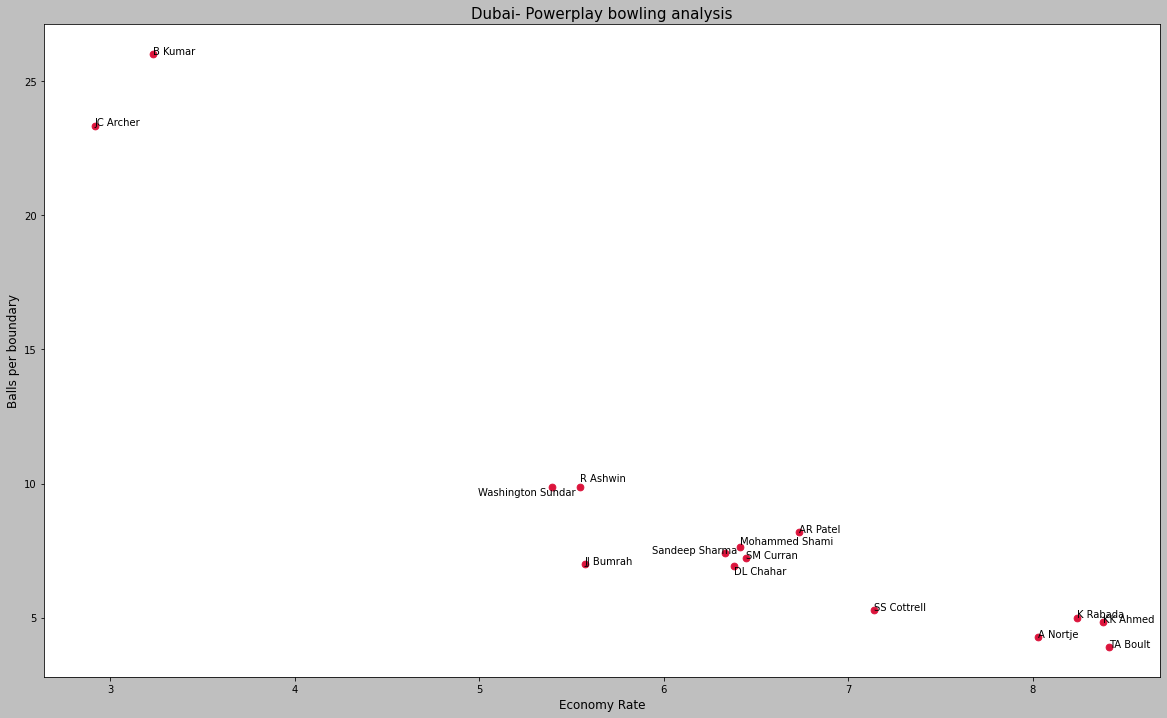

In [64]:
plt.figure(figsize = (20,12))
plt.scatter(Dubai_powerplay['Eco_rate'], Dubai_powerplay['BPB'], c = 'crimson', s = 45)
for i in range(len(Dubai_powerplay)):
    if Dubai_powerplay['bowler'][i] == 'Mohammed Shami':
        plt.text(Dubai_powerplay['Eco_rate'][i], Dubai_powerplay['BPB'][i] + 0.1, Dubai_powerplay['bowler'][i])
    elif Dubai_powerplay['bowler'][i] == 'R Ashwin':
        plt.text(Dubai_powerplay['Eco_rate'][i], Dubai_powerplay['BPB'][i] + 0.2, Dubai_powerplay['bowler'][i])
    elif Dubai_powerplay['bowler'][i] == 'Washington Sundar':
        plt.text(Dubai_powerplay['Eco_rate'][i] - 0.4, Dubai_powerplay['BPB'][i] - 0.3, Dubai_powerplay['bowler'][i])
    elif Dubai_powerplay['bowler'][i] == 'DL Chahar':
        plt.text(Dubai_powerplay['Eco_rate'][i], Dubai_powerplay['BPB'][i] - 0.3, Dubai_powerplay['bowler'][i])
    elif Dubai_powerplay['bowler'][i] == 'Sandeep Sharma':
        plt.text(Dubai_powerplay['Eco_rate'][i] - 0.4, Dubai_powerplay['BPB'][i] , Dubai_powerplay['bowler'][i])
    else: 
        plt.text(Dubai_powerplay['Eco_rate'][i], Dubai_powerplay['BPB'][i], Dubai_powerplay['bowler'][i])
        
plt.title('Dubai- Powerplay bowling analysis', fontsize = 15)
plt.xlabel('Economy Rate', fontsize = 12)
plt.ylabel('Balls per boundary', fontsize = 12)
plt.show()

                                                         

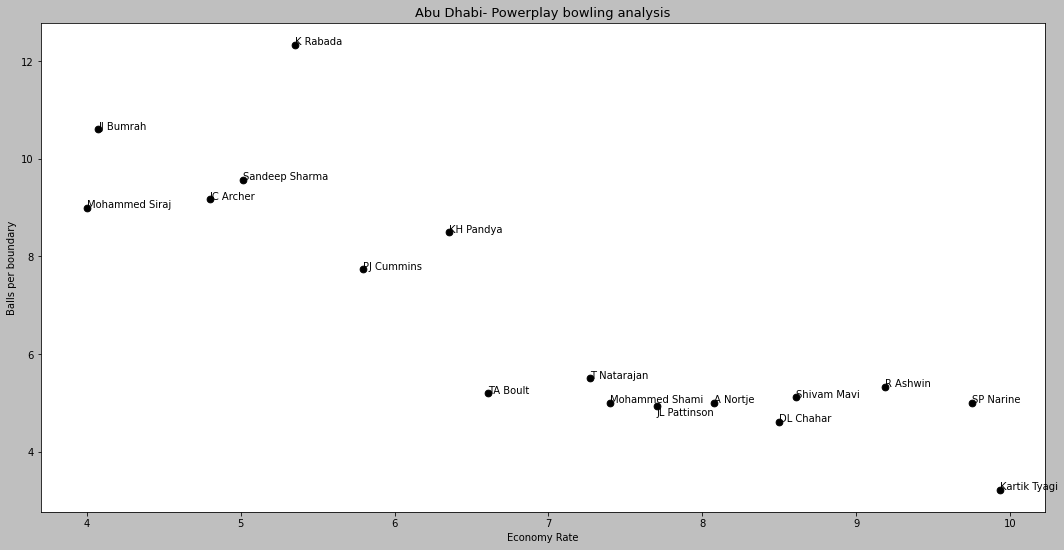

In [65]:
plt.figure(figsize = (18,9))
plt.scatter(SZ_powerplay['Eco_rate'], SZ_powerplay['BPB'], s = 45)
for i in range(len(SZ_powerplay)):
    if SZ_powerplay['bowler'][i] == 'JL Pattinson':
        plt.text(SZ_powerplay['Eco_rate'][i], SZ_powerplay['BPB'][i] - 0.2, SZ_powerplay['bowler'][i])
    else:
        plt.text(SZ_powerplay['Eco_rate'][i], SZ_powerplay['BPB'][i], SZ_powerplay['bowler'][i])

plt.title('Abu Dhabi- Powerplay bowling analysis', fontsize = 13)
plt.xlabel('Economy Rate', fontsize = 10)
plt.ylabel('Balls per boundary', fontsize = 10)
plt.show()



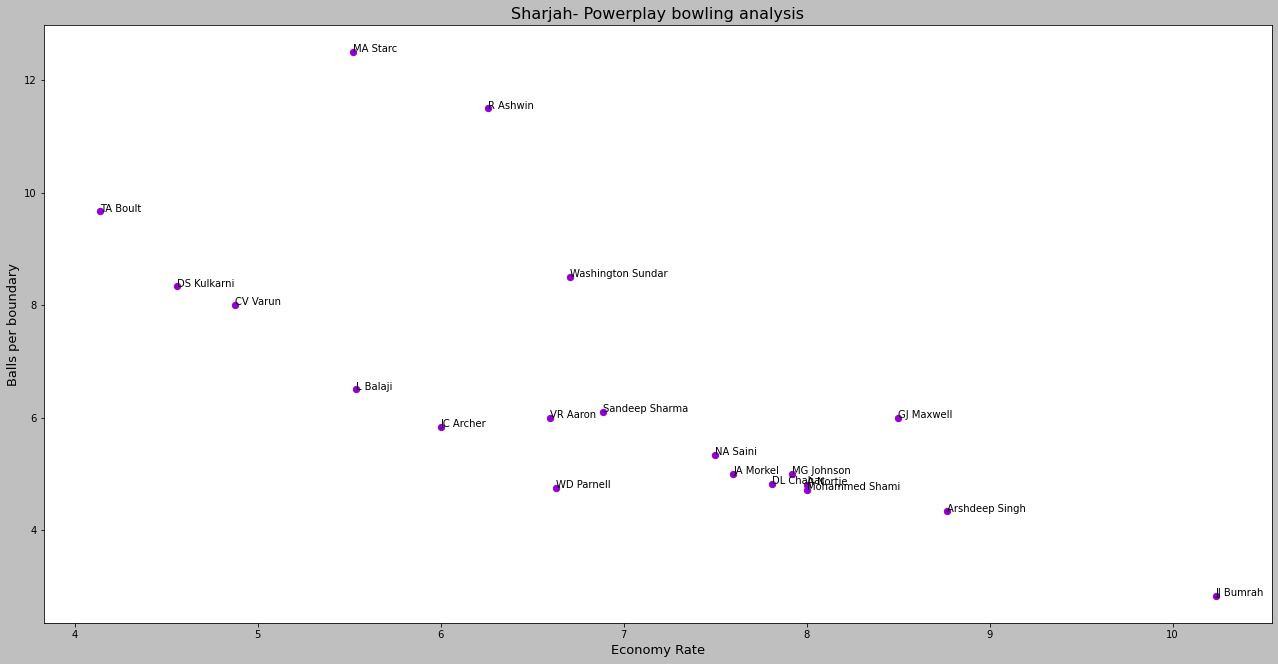

In [66]:
plt.figure(figsize = (22,11))
plt.scatter(Sharjah_powerplay['Eco_rate'], Sharjah_powerplay['BPB'], c = 'darkviolet', s = 40)
for i in range(len(Sharjah_powerplay)):
        plt.text(Sharjah_powerplay['Eco_rate'][i], Sharjah_powerplay['BPB'][i], Sharjah_powerplay['bowler'][i])

plt.title('Sharjah- Powerplay bowling analysis', fontsize = 16)
plt.xlabel('Economy Rate', fontsize = 13)
plt.ylabel('Balls per boundary', fontsize = 13)
plt.show()


### Middle overs bowling analysis

In [67]:
Dubai_middle = Bowlerstats_venue(df,'Middle', 'Dubai International Cricket Stadium').sort_values(by = 'wicket', ascending  =False)
Dubai_middle = Dubai_middle[Dubai_middle.innings >=3]
Dubai_middle = Dubai_middle[Dubai_middle.wicket >=3].reset_index()

In [68]:
SZ_middle = Bowlerstats_venue(df, 'Middle', 'Sheikh Zayed Stadium').sort_values(by = 'wicket', ascending =False)
SZ_middle = SZ_middle[SZ_middle.innings >=3]
SZ_middle = SZ_middle[SZ_middle.wicket >=2].reset_index()
SZ_middle

,index,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
0,15,CV Varun,7,130.0,132,8,46,64,12,0,9,1,34.848485,16.500000,16.250000,5.909091,13.200000,1.142857
1,111,YS Chahal,6,120.0,118,7,47,53,7,1,5,5,39.830508,16.857143,17.142857,6.101695,11.800000,1.166667
2,84,RD Chahar,8,217.0,166,7,49,80,13,1,15,8,29.518072,23.714286,31.000000,7.843373,7.217391,0.875000
3,75,PV Tambe,3,72.0,73,6,30,32,5,0,3,3,41.095890,12.166667,12.000000,5.917808,12.166667,2.000000
4,35,JJ Bumrah,8,79.0,79,6,33,32,6,0,7,1,41.772152,13.166667,13.166667,6.000000,9.875000,0.750000
5,88,S Gopal,5,84.0,78,5,31,34,4,0,6,3,39.743590,15.600000,16.800000,6.461538,8.666667,1.000000
6,85,Rashid Khan,5,106.0,112,5,43,56,4,0,6,3,38.392857,22.400000,21.200000,5.678571,12.444444,1.000000
7,5,AR Patel,6,130.0,111,4,32,59,7,1,9,3,28.828829,27.750000,32.500000,7.027027,9.250000,0.666667
8,83,RA Jadeja,5,105.0,76,4,23,31,10,0,9,3,30.263158,19.000000,26.250000,8.289474,6.333333,0.800000
9,53,LH Ferguson,3,52.0,61,4,30,22,3,0,6,0,49.180328,15.250000,13.000000,5.114754,10.166667,1.333333


In [69]:
Sharjah_middle = Bowlerstats_venue(df, 'Middle', 'Sharjah Cricket Stadium').sort_values(by = 'wicket', ascending =False)
Sharjah_middle = Sharjah_middle[Sharjah_middle.innings >=2]
Sharjah_middle = Sharjah_middle[Sharjah_middle.wicket >=2].reset_index()

In [70]:
Sharjah_middle

,index,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
0,95,YS Chahal,5,86.0,97,6,40,46,5,0,1,3,41.237113,16.166667,14.333333,5.319588,24.250000,1.200000
1,79,S Nadeem,4,63.0,69,4,23,38,4,1,2,1,33.333333,17.250000,15.750000,5.478261,23.000000,1.000000
2,5,AR Patel,4,64.0,72,4,30,34,1,2,4,1,41.666667,18.000000,16.000000,5.333333,14.400000,1.000000
3,70,R Tewatia,3,76.0,55,4,18,28,1,0,1,7,32.727273,13.750000,19.000000,8.290909,6.875000,1.333333
4,75,Rashid Khan,3,78.0,72,3,26,35,3,0,5,2,36.111111,24.000000,26.000000,6.500000,10.285714,1.000000
5,37,K Rabada,3,43.0,26,3,8,11,0,0,5,2,30.769231,8.666667,14.333333,9.923077,3.714286,1.000000
6,8,B Kumar,2,4.0,10,3,6,4,0,0,0,0,60.000000,3.333333,1.333333,2.400000,10.000000,1.500000
7,49,M Ashwin,3,46.0,42,3,17,18,3,0,1,3,40.476190,14.000000,15.333333,6.571429,10.500000,1.000000
8,1,A Nortje,3,17.0,18,3,10,5,1,0,1,1,55.555556,6.000000,5.666667,5.666667,9.000000,1.000000
9,33,JL Pattinson,2,24.0,23,2,7,12,2,0,2,0,30.434783,11.500000,12.000000,6.260870,11.500000,1.000000


### Visualizations 

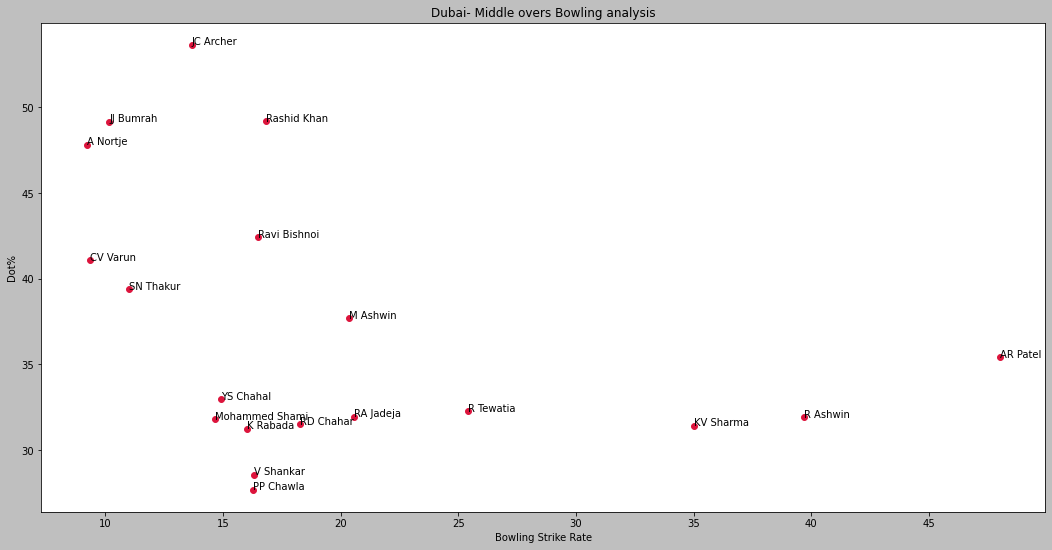

In [71]:
plt.figure(figsize = (18,9))
plt.scatter(Dubai_middle['Bowling_SR'], Dubai_middle['Dot%'], c = 'crimson', s = 35)
for i in range(len(Dubai_middle)):
    plt.text(Dubai_middle['Bowling_SR'][i], Dubai_middle['Dot%'][i], Dubai_middle['bowler'][i])
    
plt.title('Dubai- Middle overs Bowling analysis', fontsize = 12)
plt.xlabel('Bowling Strike Rate', fontsize = 10)
plt.ylabel('Dot%', fontsize = 10)

plt.show()

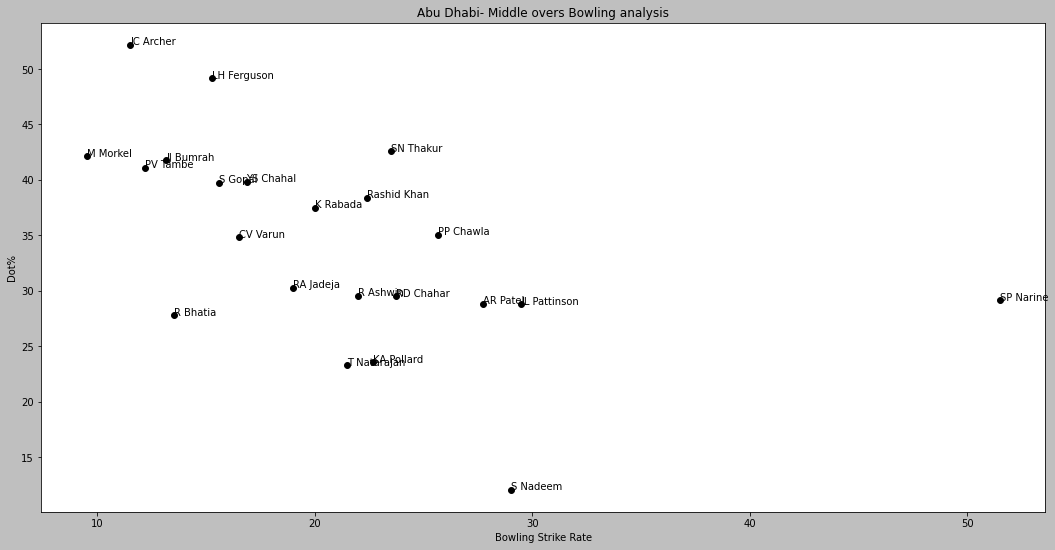

In [72]:
plt.figure(figsize = (18,9))
plt.scatter(SZ_middle['Bowling_SR'], SZ_middle['Dot%'], s = 35)

for i in range(len(SZ_middle)):
    plt.text(SZ_middle['Bowling_SR'][i], SZ_middle['Dot%'][i] , SZ_middle['bowler'][i])

        

        
    
plt.title('Abu Dhabi- Middle overs Bowling analysis', fontsize = 12)
plt.xlabel('Bowling Strike Rate', fontsize = 10)
plt.ylabel('Dot%', fontsize = 10)

plt.show()

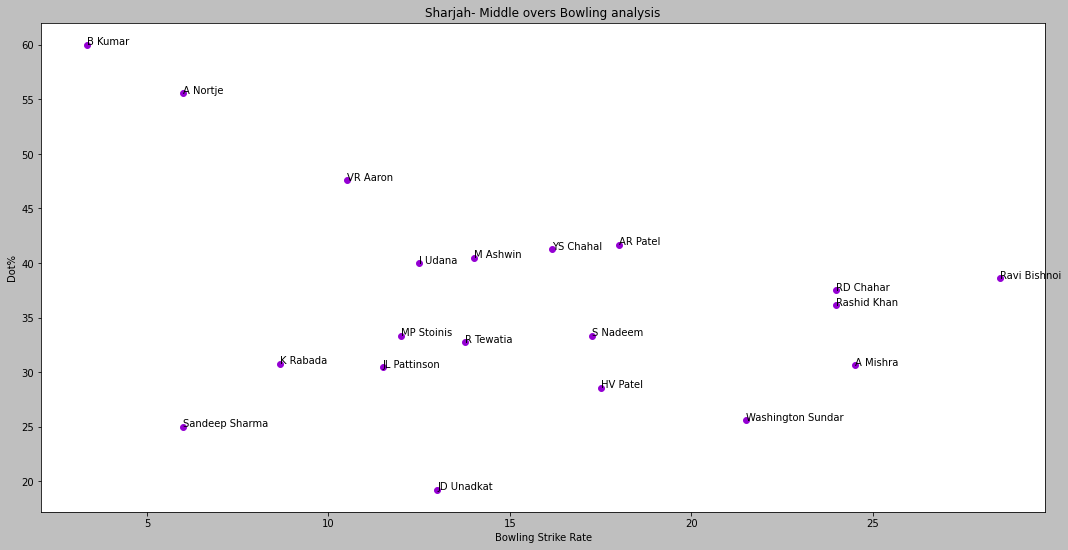

In [73]:
plt.figure(figsize = (18,9))
plt.scatter(Sharjah_middle['Bowling_SR'], Sharjah_middle['Dot%'], s = 35, c = 'darkviolet')

for i in range(len(Sharjah_middle)):
    plt.text(Sharjah_middle['Bowling_SR'][i], Sharjah_middle['Dot%'][i] , Sharjah_middle['bowler'][i])

        

        
    
plt.title('Sharjah- Middle overs Bowling analysis', fontsize = 12)
plt.xlabel('Bowling Strike Rate', fontsize = 10)
plt.ylabel('Dot%', fontsize = 10)

plt.show()

### Death overs bowling analysis

In [74]:
Dubai_death = Bowlerstats_venue(df, 'death','Dubai International Cricket Stadium').sort_values(by = 'wicket', ascending = False)

SZ_death = Bowlerstats_venue(df, 'death','Sheikh Zayed Stadium').sort_values(by = 'wicket', ascending = False)

Sharjah_death = Bowlerstats_venue(df, 'death','Sharjah Cricket Stadium').sort_values(by = 'wicket', ascending = False)

In [75]:
SZ_death

,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
32,K Rabada,5,63.0,50,8,23,15,4,0,4,4,46.000000,6.250000,7.875000,7.560000,6.250000,1.600000
69,SP Narine,6,54.0,56,8,29,14,6,0,7,0,51.785714,7.000000,6.750000,5.785714,8.000000,1.333333
27,JJ Bumrah,8,98.0,66,5,22,22,11,0,6,5,33.333333,13.200000,19.600000,8.909091,6.000000,0.625000
41,L Ngidi,2,38.0,25,4,9,10,1,0,2,3,36.000000,6.250000,9.500000,9.120000,5.000000,2.000000
66,SL Malinga,1,11.0,13,3,7,5,0,0,0,1,53.846154,4.333333,3.666667,5.076923,13.000000,3.000000
28,JL Pattinson,5,28.0,22,3,9,8,1,0,3,1,40.909091,7.333333,9.333333,7.636364,5.500000,0.600000
30,JP Faulkner,2,10.0,13,3,7,4,1,0,1,0,53.846154,4.333333,3.333333,4.615385,13.000000,1.500000
16,DJ Bravo,1,12.0,13,3,6,4,2,0,1,0,46.153846,4.333333,4.000000,5.538462,13.000000,3.000000
47,MP Stoinis,4,45.0,23,3,4,9,2,0,8,0,17.391304,7.666667,15.000000,11.739130,2.875000,0.750000
74,T Natarajan,5,67.0,44,3,12,17,8,0,4,3,27.272727,14.666667,22.333333,9.136364,6.285714,0.600000


In [76]:
Sharjah_death

,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
39,Mohammed Shami,5,92.0,38,6,10,12,2,0,4,10,26.315789,6.333333,15.333333,14.526316,2.714286,1.200000
23,JO Holder,2,18.0,18,4,7,8,2,0,0,1,38.888889,4.500000,4.500000,6.000000,18.000000,2.000000
55,SM Curran,2,31.0,25,4,10,9,2,0,3,1,40.000000,6.250000,7.750000,7.440000,6.250000,2.000000
3,AD Russell,2,56.0,26,2,8,5,5,0,4,4,30.769231,13.000000,28.000000,12.923077,3.250000,1.000000
25,K Rabada,3,42.0,18,2,4,8,0,0,1,5,22.222222,9.000000,21.000000,14.000000,3.000000,0.666667
6,B Kumar,2,14.0,14,2,5,6,2,0,1,0,35.714286,7.000000,7.000000,6.000000,14.000000,1.000000
9,CJ Jordan,2,24.0,20,2,7,10,0,0,2,1,35.000000,10.000000,12.000000,7.200000,6.666667,1.000000
1,A Nortje,3,53.0,32,2,10,13,2,0,3,4,31.250000,16.000000,26.500000,9.937500,4.571429,0.666667
21,JJ Bumrah,2,29.0,20,2,9,5,2,0,2,2,45.000000,10.000000,14.500000,8.700000,5.000000,1.000000
18,JC Archer,3,42.0,28,2,9,12,2,0,2,3,32.142857,14.000000,21.000000,9.000000,5.600000,0.666667


In [77]:
Dubai_death = Dubai_death[Dubai_death.innings >=3]
Dubai_death = Dubai_death[Dubai_death.wicket >=2].reset_index(drop = True)
Dubai_death

,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
0,K Rabada,8,75.0,57,8,21,19,8,0,7,2,36.842105,7.125000,9.375000,7.894737,6.333333,1.000000
1,T Natarajan,8,114.0,66,7,19,26,4,0,11,6,28.787879,9.428571,16.285714,10.363636,3.882353,0.875000
2,CH Morris,3,28.0,25,5,11,8,3,0,2,1,44.000000,5.000000,5.600000,6.720000,8.333333,1.666667
3,Arshdeep Singh,4,54.0,35,5,14,11,2,1,3,4,40.000000,7.000000,10.800000,9.257143,5.000000,1.250000
4,JD Unadkat,5,103.0,50,4,9,21,6,0,7,7,18.000000,12.500000,25.750000,12.360000,3.571429,0.800000
5,DW Steyn,4,69.0,35,4,8,13,4,0,6,4,22.857143,8.750000,17.250000,11.828571,3.500000,1.000000
6,JO Holder,3,29.0,20,4,4,9,5,0,1,1,20.000000,5.000000,7.250000,8.700000,10.000000,1.333333
7,A Nortje,7,77.0,58,4,20,26,1,1,7,3,34.482759,14.500000,19.250000,7.965517,5.800000,0.571429
8,CJ Jordan,4,91.0,45,4,10,16,5,1,8,5,22.222222,11.250000,22.750000,12.133333,3.461538,1.000000
9,TA Boult,4,34.0,24,3,8,10,2,0,2,2,33.333333,8.000000,11.333333,8.500000,6.000000,0.750000


In [78]:
SZ_death = SZ_death[SZ_death.innings >=2]
SZ_death = SZ_death[SZ_death.wicket >=2].reset_index()
SZ_death

,index,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
0,32,K Rabada,5,63.0,50,8,23,15,4,0,4,4,46.000000,6.250000,7.875000,7.560000,6.250000,1.600000
1,69,SP Narine,6,54.0,56,8,29,14,6,0,7,0,51.785714,7.000000,6.750000,5.785714,8.000000,1.333333
2,27,JJ Bumrah,8,98.0,66,5,22,22,11,0,6,5,33.333333,13.200000,19.600000,8.909091,6.000000,0.625000
3,41,L Ngidi,2,38.0,25,4,9,10,1,0,2,3,36.000000,6.250000,9.500000,9.120000,5.000000,2.000000
4,28,JL Pattinson,5,28.0,22,3,9,8,1,0,3,1,40.909091,7.333333,9.333333,7.636364,5.500000,0.600000
5,30,JP Faulkner,2,10.0,13,3,7,4,1,0,1,0,53.846154,4.333333,3.333333,4.615385,13.000000,1.500000
6,47,MP Stoinis,4,45.0,23,3,4,9,2,0,8,0,17.391304,7.666667,15.000000,11.739130,2.875000,0.750000
7,74,T Natarajan,5,67.0,44,3,12,17,8,0,4,3,27.272727,14.666667,22.333333,9.136364,6.285714,0.600000
8,3,AD Russell,4,54.0,38,3,12,16,2,0,7,1,31.578947,12.666667,18.000000,8.526316,4.750000,0.750000
9,75,TA Boult,8,115.0,67,3,15,31,3,0,15,3,22.388060,22.333333,38.333333,10.298507,3.722222,0.375000


In [79]:
Sharjah_death = Sharjah_death[Sharjah_death.innings >=2]
Sharjah_death = Sharjah_death[Sharjah_death.wicket >=2].reset_index()
Sharjah_death

,index,bowler,innings,runs_conceded,balls,wicket,dots,ones,twos,threes,fours,six,Dot%,Bowling_SR,Bowling_AVG,Eco_rate,BPB,WPI
0,39,Mohammed Shami,5,92.0,38,6,10,12,2,0,4,10,26.315789,6.333333,15.333333,14.526316,2.714286,1.200000
1,23,JO Holder,2,18.0,18,4,7,8,2,0,0,1,38.888889,4.500000,4.500000,6.000000,18.000000,2.000000
2,55,SM Curran,2,31.0,25,4,10,9,2,0,3,1,40.000000,6.250000,7.750000,7.440000,6.250000,2.000000
3,3,AD Russell,2,56.0,26,2,8,5,5,0,4,4,30.769231,13.000000,28.000000,12.923077,3.250000,1.000000
4,25,K Rabada,3,42.0,18,2,4,8,0,0,1,5,22.222222,9.000000,21.000000,14.000000,3.000000,0.666667
5,6,B Kumar,2,14.0,14,2,5,6,2,0,1,0,35.714286,7.000000,7.000000,6.000000,14.000000,1.000000
6,9,CJ Jordan,2,24.0,20,2,7,10,0,0,2,1,35.000000,10.000000,12.000000,7.200000,6.666667,1.000000
7,1,A Nortje,3,53.0,32,2,10,13,2,0,3,4,31.250000,16.000000,26.500000,9.937500,4.571429,0.666667
8,21,JJ Bumrah,2,29.0,20,2,9,5,2,0,2,2,45.000000,10.000000,14.500000,8.700000,5.000000,1.000000
9,18,JC Archer,3,42.0,28,2,9,12,2,0,2,3,32.142857,14.000000,21.000000,9.000000,5.600000,0.666667


### Visualizations 

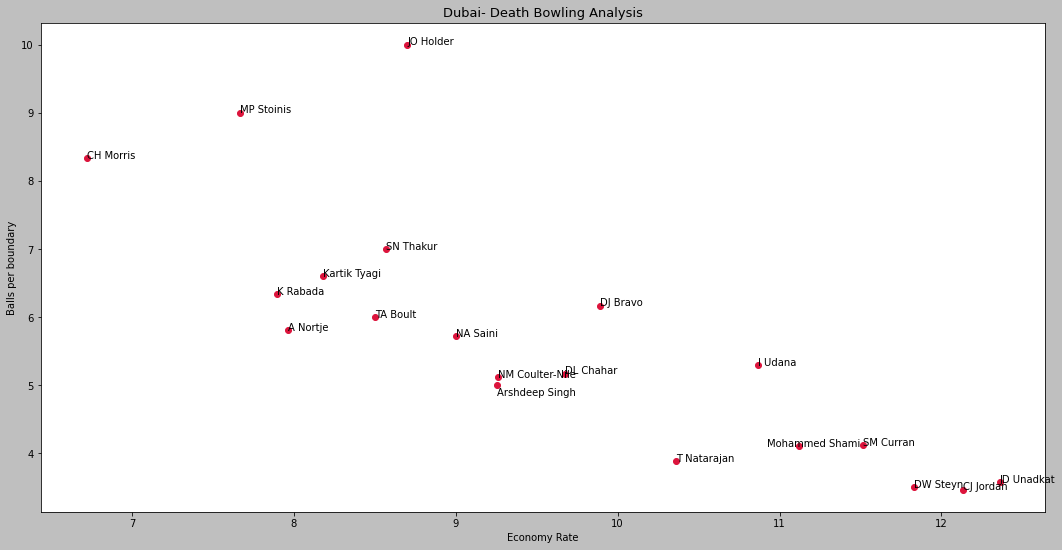

In [80]:
plt.figure(figsize = (18,9))
plt.scatter(Dubai_death['Eco_rate'], Dubai_death['BPB'], c = 'crimson')

for i in range(len(Dubai_death)):
    if Dubai_death['bowler'][i] == 'Arshdeep Singh':
        plt.text(Dubai_death['Eco_rate'][i], Dubai_death['BPB'][i] - 0.15, Dubai_death['bowler'][i])
    elif Dubai_death['bowler'][i] == 'Mohammed Shami':
        plt.text(Dubai_death['Eco_rate'][i] - 0.2, Dubai_death['BPB'][i], Dubai_death['bowler'][i])
    else:
        plt.text(Dubai_death['Eco_rate'][i], Dubai_death['BPB'][i], Dubai_death['bowler'][i])

plt.title('Dubai- Death Bowling Analysis', fontsize = 13)
plt.xlabel('Economy Rate', fontsize = 10)
plt.ylabel('Balls per boundary', fontsize = 10)

plt.show()



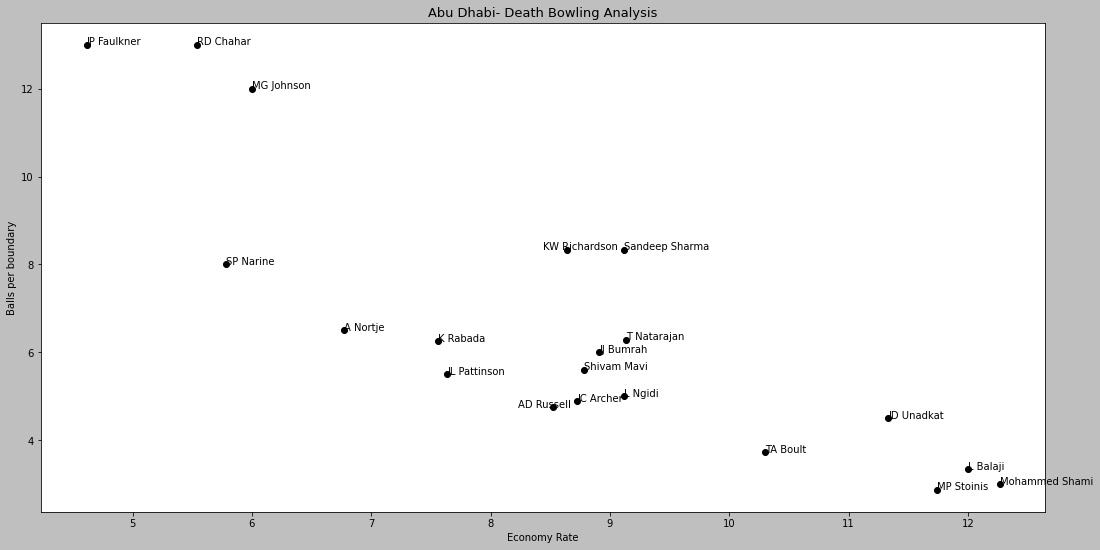

In [81]:
plt.figure(figsize = (18,9))
plt.scatter(SZ_death['Eco_rate'], SZ_death['BPB'])

for i in range(len(SZ_death)):
    if SZ_death['bowler'][i] == 'KW Richardson':
        plt.text(SZ_death['Eco_rate'][i] - 0.2, SZ_death['BPB'][i], SZ_death['bowler'][i])
    elif SZ_death['bowler'][i] == 'AD Russell':
        plt.text(SZ_death['Eco_rate'][i] - 0.3, SZ_death['BPB'][i], SZ_death['bowler'][i])

    
    else:
        plt.text(SZ_death['Eco_rate'][i], SZ_death['BPB'][i], SZ_death['bowler'][i])

        

plt.title('Abu Dhabi- Death Bowling Analysis', fontsize = 13)
plt.xlabel('Economy Rate', fontsize = 10)
plt.ylabel('Balls per boundary', fontsize = 10)

plt.show()

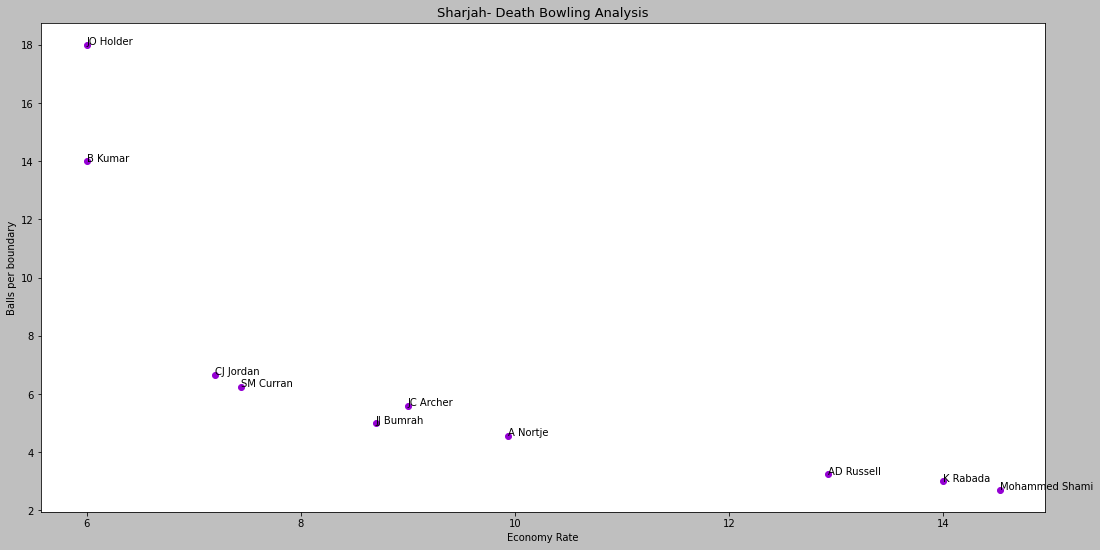

In [82]:
plt.figure(figsize = (18,9))
plt.scatter(Sharjah_death['Eco_rate'], Sharjah_death['BPB'], c = 'darkviolet')

for i in range(len(Sharjah_death)):
        plt.text(Sharjah_death['Eco_rate'][i], Sharjah_death['BPB'][i], Sharjah_death['bowler'][i])

        

plt.title('Sharjah- Death Bowling Analysis', fontsize = 13)
plt.xlabel('Economy Rate', fontsize = 10)
plt.ylabel('Balls per boundary', fontsize = 10)

plt.show()

In [83]:
def Type_of_bowling(bowler):
    if bowler == 'KH Pandya':
        return 'Left arm orthodox'
    elif bowler == 'RA Jadeja':
        return 'Left arm orthodox'
    elif bowler == 'JJ Bumrah':
        return 'Right arm fast'
    elif bowler == 'RD Chahar':
        return 'Right arm leg break'
    elif bowler == 'JH Kallis':
        return 'Right arm fast medium'
    elif bowler == 'Shakib Al Hasan':
        return 'Left arm orthodox'
    elif bowler == 'M Morkel':
        return 'Right arm fast'
    elif bowler == 'R Vinay Kumar':
        return 'Right arm fast medium'
    elif bowler == 'SP Narine':
        return 'Right arm off break'
    elif bowler == 'Z Khan':
        return 'Left arm fast'
    elif bowler == 'PP Ojha':
        return 'Left arm orthodox'
    elif bowler == 'Harbhajan Singh':
        return 'Right arm off break'
    elif bowler == 'CJ Anderson':
        return 'Left arm fast medium'
    elif bowler == 'SL Malinga':
        return 'Right arm fast'
    elif bowler == 'KA Pollard':
        return 'Right arm medium'
    elif bowler == 'WD Parnell':
        return 'Left arm fast medium'
    elif bowler == 'S Nadeem':
        return 'Left arm orthodox'
    elif bowler == 'JP Duminy':
        return 'Right arm off break'
    elif bowler == 'R Sharma':
        return 'Right arm leg break'
    elif bowler == 'JDS Neesham':
        return 'Right arm fast medium'
    elif bowler == 'AB Dinda':
        return 'Right arm fast medium'
    elif bowler == 'JA Morkel':
        return 'Right arm fast medium'
    elif bowler == 'VR Aaron':
        return 'Right arm fast'
    elif bowler == 'YS Chahal':
        return 'Right arm leg break'
    elif bowler == 'MA Starc':
        return 'Left arm fast'
    elif bowler == 'Yuvraj Singh':
        return 'Left arm orthodox'
    elif bowler == 'R Bhatia':
        return 'Right arm medium'
    elif bowler == 'PV Tambe':
        return 'Right arm leg break'
    elif bowler == 'KW Richardson':
        return 'Right arm fast medium'
    elif bowler == 'DS Kulkarni':
        return 'Right arm fast medium'
    elif bowler == 'JP Faulkner':
        return 'Left arm fast medium'
    elif bowler == 'DW Steyn':
        return 'Right arm fast'
    elif bowler == 'STR Binny':
        return 'Right arm fast medium'
    elif bowler == 'A Mishra':
        return 'Right arm leg break'
    elif bowler == 'I Sharma':
        return 'Right arm fast medium'
    elif bowler == 'KV Sharma':
        return 'Right arm leg break'
    elif bowler == 'B Kumar':
        return 'Right arm fast medium'
    elif bowler == 'DJG Sammy':
        return 'Right arm fast medium'
    elif bowler == 'GJ Maxwell':
        return 'Right arm off break'
    elif bowler == 'R Dhawan':
        return 'Right arm fast medium'
    elif bowler == 'AR Patel':
        return 'Left arm orthodox'
    elif bowler == 'L Balaji':
        return 'Right arm fast medium'
    elif bowler == 'P Awana':
        return 'Right arm medium'
    elif bowler == 'MG Johnson':
        return 'Left arm fast'
    elif bowler == 'R Ashwin':
        return 'Right arm off break' 
    elif bowler == 'DR Smith':
        return 'Right arm medium'
    elif bowler == 'P Negi':
        return 'Left arm orthodox'
    elif bowler == 'MM Sharma':
        return 'Right arm fast medium'
    elif bowler == 'A Nehra':
        return 'Left arm fast medium'
    elif bowler == 'JD Unadkat':
        return 'Left arm fast medium'
    elif bowler == 'NM Coulter-Nile':
        return 'Right arm fast'
    elif bowler == 'JJ Bumrah':
        return 'Right arm fast'
    elif bowler == 'MM Karthik':
        return 'Left arm orthodox'
    elif bowler == 'IC Pandey':
        return 'Right arm fast medium'
    elif bowler == 'BW Hilfenhaus':
        return 'Right arm fast medium'
    elif bowler == 'M Vijay':
        return 'Right arm off break'
    elif bowler == 'Sandeep Sharma':
        return 'Right arm medium'
    elif bowler == 'IK Pathan':
        return 'Left arm fast medium'
    elif bowler == 'SK Raina':
        return 'Right arm off break'
    elif bowler == 'TG Southee':
        return 'Right arm fast medium'
    elif bowler == 'SR Watson':
        return 'Right arm fast medium'
    elif bowler == 'UT Yadav':
        return 'Right arm fast'
    elif bowler == 'M Muralitharan':
        return 'Right arm off break'
    elif bowler == 'LR Shukla':
        return 'Right arm medium'
    elif bowler == 'Y Venugopal Rao':
        return 'Right arm off break'
    elif bowler == 'R Rampaul':
        return 'Right arm fast medium'
    elif bowler == 'RG Sharma':
        return 'Right arm off break'
    elif bowler == 'Iqbal Abdulla':
        return 'Left arm orthodox'
    elif bowler == 'TA Boult':
        return 'Left arm fast medium'
    elif bowler == 'JL Pattinson':
        return 'Right arm fast medium'
    elif bowler == 'DL Chahar':
        return 'Right arm fast medium'
    elif bowler == 'SM Curran':
        return 'Left arm fast medium'
    elif bowler == 'L Ngidi':
        return 'Right arm fast medium'
    elif bowler == 'K Rabada':
        return 'Right arm fast'
    elif bowler == 'MP Stoinis':
        return 'Right arm medium'
    elif bowler == 'A Nortje':
        return 'Right arm fast'
    elif bowler == 'CJ Jordan':
        return 'Right arm fast medium'
    elif bowler == 'K Gowtham':
        return 'Right arm off break'
    elif bowler == 'Ravi Bishnoi':
        return 'Right arm leg break'
    elif bowler == 'SS Cottrell':
        return 'Left arm fast medium'
    elif bowler == 'Rashid Khan':
        return 'Right arm leg break'
    elif bowler == 'Abhishek Sharma':
        return 'Left arm orthodox'
    elif bowler == 'V Shankar':
        return 'Right arm medium'
    elif bowler == 'T Natarajan':
        return 'Left arm fast medium'
    elif bowler == 'MR Marsh':
        return 'Right arm medium'
    elif bowler == 'S Dube':
        return 'Right arm medium'
    elif bowler == 'NA Saini':
        return 'Right arm fast'
    elif bowler == 'Washington Sundar':
        return 'Right arm off break'
    elif bowler == 'JC Archer':
        return 'Right arm fast'
    elif bowler == 'R Tewatia':
        return 'Right arm leg break'
    elif bowler == 'TK Curran':
        return 'Right arm fast medium'
    elif bowler == 'S Gopal':
        return 'Right arm leg break'
    elif bowler == 'AD Russell':
        return 'Right arm fast medium'
    elif bowler == 'Kuldeep Yadav':
        return 'Left arm chinaman'
    elif bowler == 'S Sandeep Warrier':
        return 'Right arm fast medium'
    elif bowler == 'PJ Cummins':
        return 'Right arm fast'
    elif bowler == 'Shivam Mavi':
        return 'Right arm fast medium'
    elif bowler == 'M Ashwin':
        return 'Right arm leg break'
    elif bowler == 'Avesh Khan':
        return 'Right arm fast medium'
    elif bowler == 'JR Hazlewood':
        return 'Right arm fast medium'
    elif bowler == 'Mohammad Nabi':
        return 'Right arm off break'
    elif bowler == 'KL Nagarkoti':
        return 'Right arm fast medium'
    elif bowler == 'CV Varun':
        return 'Right arm off break'
    elif bowler == 'KK Ahmed':
        return 'Left arm fast medium'
    elif bowler == 'AS Rajpoot':
        return 'Right arm fast medium'
    elif bowler == 'I Udana':
        return 'Left arm fast medium'
    elif bowler == 'A Zampa':
        return 'Right arm leg break'
    elif bowler == 'R Parag':
        return 'Right arm off break'
    elif bowler == 'DJ Bravo':
        return 'Right arm fast medium'
    elif bowler == 'SN Thakur':
        return 'Right arm fast medium'
    elif bowler == 'Abdul Samad':
        return 'Right arm leg break'
    elif bowler == 'HV Patel':
        return 'Right arm medium'
    elif bowler == 'Harpreet Brar':
        return 'Left arm orthodox'
    elif bowler == 'S Kaul':
        return 'Right arm fast medium'
    elif bowler == 'KS Williamson':
        return 'Right arm off break'
    elif bowler == 'Mohammed Siraj':
        return 'Right arm fast medium'
    elif bowler == 'MM Ali':
        return 'Right arm off break'
    elif bowler == 'Kartik Tyagi':
        return 'Right arm fast medium'
    elif bowler == 'Arshdeep Singh':
        return 'Left arm fast medium'
    elif bowler == 'Mujeeb Ur Rahman':
        return 'Right arm off break'
    elif bowler == 'AJ Tye':
        return 'Right arm fast medium'
    elif bowler == 'M Prasidh Krishna':
        return 'Right arm fast medium'
    elif bowler == 'CH Morris':
        return 'Right arm fast medium'
    elif bowler == 'N Rana':
        return 'Right arm off break'
    elif bowler == 'BA Stokes':
        return 'Right arm fast medium'
    elif bowler == 'TU Deshpande':
        return 'Right arm fast medium'
    elif bowler == 'CJ Green':
        return 'Right arm off break'
    elif bowler == 'Shahbaz Ahmed':
        return 'Left arm orthodox'
    elif bowler == 'LH Ferguson':
        return 'Right arm fast'
    elif bowler == 'Basil Thampi':
        return 'Right arm fast medium'
    elif bowler == 'DJ Hooda':
        return 'Right arm off break'
    elif bowler == 'DR Sams':
        return 'Left arm fast medium'
    elif bowler == 'JO Holder':
        return 'Right arm fast medium'
    elif bowler == 'Imran Tahir':
        return 'Right arm leg break'
    elif bowler == 'Monu Kumar':
        return 'Right arm medium'
    elif bowler == 'MJ Santner':
        return 'Left arm orthodox'
    elif bowler == 'DA Warner':
        return 'Right arm leg break'
    elif bowler == 'P Dubey':
        return 'Right arm leg break'
    elif bowler == 'J Yadav':
        return 'Right arm off break'
    elif bowler == 'CH Gayle':
        return 'Right arm off break'
    elif bowler == 'PP Chawla':
        return 'Right arm leg break'
    elif bowler == 'Mohammed Shami':
        return 'Right arm fast'
    elif bowler == 'M Kartik':
        return 'Left arm orthodox'
        

In [84]:
df1['bowling_type'] = df1.apply(lambda x: Type_of_bowling(x['bowler']), axis = 1)

In [85]:
df_null = df1.isnull()
df_null[df_null.bowling_type == True]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isBowlerWk,total_runs,Phases,bowling_type


In [86]:
df1.bowling_type.unique()

array(['Right arm fast medium', 'Left arm orthodox', 'Right arm fast',
       'Right arm off break', 'Right arm leg break', 'Left arm fast',
       'Left arm fast medium', 'Right arm medium', 'Left arm chinaman'],
      dtype=object)

In [95]:
    df1['isDot'] = df1['total_runs'].apply(lambda x : 1 if x == 0 else 0)
    df1['isOne'] = df1['total_runs'].apply(lambda x : 1 if x == 1 else 0)
    df1['isTwo'] = df1['total_runs'].apply(lambda x : 1 if x == 2 else 0)
    df1['isThree'] = df1['total_runs'].apply(lambda x : 1 if x == 3 else 0)
    df1['isFour'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 4 else 0)
    df1['isSix'] = df1['runs_off_bat'].apply(lambda x : 1 if x == 6 else 0)
 

## Pace vs spin

In [111]:
df1.bowling_type.unique()

array(['Right arm fast medium', 'Left arm orthodox', 'Right arm fast',
       'Right arm off break', 'Right arm leg break', 'Left arm fast',
       'Left arm fast medium', 'Right arm medium', 'Left arm chinaman'],
      dtype=object)

In [112]:
Pace_spin_1 = df1.groupby(['striker','bowling_type','venue'])['runs_off_bat','isBowlerWk','isFour','isSix'].sum().reset_index()
Pace_spin_2 = df1.groupby(['striker','bowling_type','venue'])['ball'].count().to_frame()

In [113]:
Pace_spin_3 = df1.groupby(['striker','bowling_type','venue'])['match_id'].nunique().to_frame()


In [114]:
Pace_spin =  pd.merge(Pace_spin_1, Pace_spin_2, on = ['striker','bowling_type','venue']).merge(Pace_spin_3, on = ['striker','bowling_type','venue'])

In [115]:
Pace_spin = Pace_spin[['striker','bowling_type','venue','match_id','runs_off_bat','ball','isBowlerWk','isFour','isSix']].rename(columns = {'runs_off_bat':'runs','isBowlerWk':'dismissals','isFour':'fours','isSix':'sixes', 'match_id':'innings'})
Pace_spin.head()

,striker,bowling_type,venue,innings,runs,ball,dismissals,fours,sixes
0,A Mishra,Left arm fast,Sharjah Cricket Stadium,1,1,2,0,0,0
1,A Mishra,Right arm fast medium,Sharjah Cricket Stadium,1,3,3,0,0,0
2,A Nortje,Left arm fast medium,Dubai International Cricket Stadium,1,1,3,1,0,0
3,A Nortje,Left arm fast medium,Sheikh Zayed Stadium,1,3,2,0,0,0
4,A Nortje,Right arm fast medium,Dubai International Cricket Stadium,1,3,1,0,0,0


In [ ]:
# A few examples

In [116]:
Pace_spin[Pace_spin.striker == 'RG Sharma']

,striker,bowling_type,venue,innings,runs,ball,dismissals,fours,sixes
1249,RG Sharma,Left arm chinaman,Sheikh Zayed Stadium,1,21,12,0,0,2
1250,RG Sharma,Left arm fast medium,Dubai International Cricket Stadium,2,8,5,1,0,1
1251,RG Sharma,Left arm fast medium,Sheikh Zayed Stadium,2,8,7,0,1,0
1252,RG Sharma,Left arm orthodox,Dubai International Cricket Stadium,2,17,14,0,2,0
1253,RG Sharma,Left arm orthodox,Sharjah Cricket Stadium,1,3,3,0,0,0
1254,RG Sharma,Left arm orthodox,Sheikh Zayed Stadium,2,12,12,1,0,0
1255,RG Sharma,Right arm fast,Dubai International Cricket Stadium,3,28,21,1,4,1
1256,RG Sharma,Right arm fast,Sharjah Cricket Stadium,1,1,2,0,0,0
1257,RG Sharma,Right arm fast,Sheikh Zayed Stadium,6,40,40,2,3,3
1258,RG Sharma,Right arm fast medium,Dubai International Cricket Stadium,3,22,25,2,1,1


In [117]:
Rayudu = Pace_spin[Pace_spin.striker == 'AT Rayudu'].groupby(['striker','bowling_type'])['runs'].sum().to_frame()
Rayudu.head()

runs
striker   bowling_type               
AT Rayudu Left arm fast             2
          Left arm fast medium     36
          Left arm orthodox        58
          Right arm fast          110
          Right arm fast medium   106

In [104]:
Pace_spin_groupby = Pace_spin.groupby(['striker','bowling_type'])['runs','ball','dismissals'].sum().reset_index()
Pace_spin_groupby[Pace_spin_groupby.striker == 'V Kohli']

,striker,bowling_type,runs,ball,dismissals
907,V Kohli,Left arm fast,0,2,1
908,V Kohli,Left arm fast medium,63,49,3
909,V Kohli,Left arm orthodox,70,75,0
910,V Kohli,Right arm fast,50,50,3
911,V Kohli,Right arm fast medium,162,119,2
912,V Kohli,Right arm leg break,139,112,2
913,V Kohli,Right arm medium,40,33,2
914,V Kohli,Right arm off break,52,52,2


## Venue Wise

In [118]:
df_venue_1 = df1.groupby(['venue','bowling_type','Phases'])['runs_off_bat','isDot','isFour','isSix','isBowlerWk'].sum()

In [119]:
df_venue_2 = df1.groupby(['venue','bowling_type','Phases'])['ball'].count()

In [120]:
df_venue = pd.merge(df_venue_1, df_venue_2, on = ['venue','bowling_type','Phases']).reset_index()

In [121]:
df_venue[['venue','bowling_type','Phases','runs_off_bat','ball','isBowlerWk']].set_index(['venue','bowling_type','Phases'])

runs_off_bat  \
venue                               bowling_type          Phases                    
Dubai International Cricket Stadium Left arm chinaman     Middle                4   
                                                          death                16   
                                    Left arm fast         Middle               26   
                                                          Powerplay            81   
                                                          death                20   
                                    Left arm fast medium  Middle              322   
                                                          Powerplay           619   
                                                          death               580   
                                    Left arm orthodox     Middle              691   
                                                          Powerplay           130   
                                                          death                68   
                                    Right arm fast        Middle              574   
                                                          Powerplay           707   
                                                          death               652   
                                    Right arm fast medium Middle              726   
                                                          Powerplay           669   
                                                          death               694   
                                    Right arm leg break   Middle             1402   
                                                          Powerplay           112   
                                                          death               224   
                                    Right arm medium      Middle              327   
                                                          Powerplay           180   
                                                          death               141   
                                    Right arm off break   Middle              685   
                                                          Powerplay           241   
                                                          death                74   
Sharjah Cricket Stadium             Left arm fast         Middle                7   
                                                          Powerplay            54   
                                                          death                71   
                                    Left arm fast medium  Middle              150   
                                                          Powerplay           187   
                                                          death               207   
                                    Left arm orthodox     Middle              355   
                                                          Powerplay            49   
                                                          death                48   
                                    Right arm fast        Middle              206   
                                                          Powerplay           436   
                                                          death               358   
                                    Right arm fast medium Middle              673   
                                                          Powerplay           527   
                                                          death               464   
                                    Right arm leg break   Middle              800   
                                                          Powerplay            80   
                                                          death                52   
                                    Right arm medium      Middle              161   
                                                          Powerplay       

## Bowling type stats in all the venues

In [128]:
Pace_spin_venue_1 = df1.groupby(['venue','season','bowling_type'])['runs_off_bat','isBowlerWk'].sum()
Pace_spin_venue_1

Pace_spin_venue_2 = df1.groupby(['venue','season','bowling_type'])['ball'].count()
Pace_spin_venue_2

Pace_spin_venue = pd.merge(Pace_spin_venue_1,Pace_spin_venue_2, on = ['venue','season','bowling_type'])
Pace_spin_venue

runs_off_bat  \
venue                               season bowling_type                          
Dubai International Cricket Stadium 2014   Left arm fast                   127   
                                           Left arm fast medium            191   
                                           Left arm orthodox               246   
                                           Right arm fast                  321   
                                           Right arm fast medium           479   
                                           Right arm leg break             234   
                                           Right arm medium                 94   
                                           Right arm off break             250   
                                    2020   Left arm chinaman                20   
                                           Left arm fast medium           1330   
                                           Left arm orthodox               643   
                                           Right arm fast                 1612   
                                           Right arm fast medium          1610   
                                           Right arm leg break            1504   
                                           Right arm medium                554   
                                           Right arm off break             750   
Sharjah Cricket Stadium             2014   Left arm fast                   132   
                                           Left arm fast medium            150   
                                           Left arm orthodox               204   
                                           Right arm fast                  217   
                                           Right arm fast medium           523   
                                           Right arm leg break             252   
                                           Right arm medium                117   
                                           Right arm off break             133   
                                    2020   Left arm fast medium            394   
                                           Left arm orthodox               248   
                                           Right arm fast                  783   
                                           Right arm fast medium          1141   
                                           Right arm leg break             680   
                                           Right arm medium                245   
                                           Right arm off break             418   
Sheikh Zayed Stadium                2014   Left arm fast                   115   
                                           Left arm fast medium            129   
                                           Left arm orthodox               274   
                                           Right arm fast                  199   
                                           Right arm fast medium           558   
                                           Right arm leg break             183   
                                           Right arm medium                167   
                                           Right arm off break             208   
                                    2020   Left arm chinaman                69   
                                           Left arm fast medium            775   
                                           Left arm orthodox               507   
                                           Right arm fast                 1242   
                                           Right arm fast medium          1944   
                                           Right arm leg break            1064   
                                           Right arm medium                320   
                                           Right arm off break             713   

                                               

### Examples of a few batsman 

In [161]:
Rahul_1 = df1[df1.striker == 'KL Rahul'].groupby(['striker','bowling_type','venue','Phases'])['runs_off_bat','isBowlerWk'].sum()
Rahul_2 = df1[df1.striker == 'KL Rahul'].groupby(['striker','bowling_type','venue','Phases'])['ball'].count()
pd.merge(Rahul_1, Rahul_2, on = ['striker','bowling_type','Phases','venue','Phases'])

runs_off_bat  \
striker  bowling_type          Phases    venue                               Phases                    
KL Rahul Left arm fast         Powerplay Dubai International Cricket Stadium Powerplay             7   
                               death     Dubai International Cricket Stadium death                 3   
         Left arm fast medium  Middle    Dubai International Cricket Stadium Middle                4   
                               Powerplay Dubai International Cricket Stadium Powerplay            63   
                               Middle    Sharjah Cricket Stadium             Middle                2   
                               Powerplay Sharjah Cricket Stadium             Powerplay             7   
                               death     Sharjah Cricket Stadium             death                 2   
                               Powerplay Sheikh Zayed Stadium                Powerplay            10   
         Left arm orthodox     Middle    Dubai International Cricket Stadium Middle               20   
                               Powerplay Dubai International Cricket Stadium Powerplay            10   
                               Middle    Sharjah Cricket Stadium             Middle               14   
                                         Sheikh Zayed Stadium                Middle                2   
                               Powerplay Sheikh Zayed Stadium                Powerplay             3   
         Right arm fast        Middle    Dubai International Cricket Stadium Middle               32   
                               Powerplay Dubai International Cricket Stadium Powerplay            47   
                               death     Dubai International Cricket Stadium death                57   
                               Middle    Sharjah Cricket Stadium             Middle                8   
                               Powerplay Sharjah Cricket Stadium             Powerplay            32   
                               Middle    Sheikh Zayed Stadium                Middle               19   
                               Powerplay Sheikh Zayed Stadium                Powerplay            31   
         Right arm fast medium Middle    Dubai International Cricket Stadium Middle               31   
                               Powerplay Dubai International Cricket Stadium Powerplay            22   
                               death     Dubai International Cricket Stadium death                 0   
                               Middle    Sharjah Cricket Stadium             Middle               47   
                               Powerplay Sharjah Cricket Stadium             Powerplay            41   
                               death     Sharjah Cricket Stadium             death                 5   
                               Middle    Sheikh Zayed Stadium                Middle               25   
                               Powerplay Sheikh Zayed Stadium                Powerplay            38   
                               death     Sheikh Zayed Stadium                death                10   
         Right arm leg break   Middle    Dubai International Cricket Stadium Middle               32   
                                         Sharjah Cricket Stadium             Middle               18   
                               Powerplay Sharjah Cricket Stadium             Powerplay             1   
                               death     Sharjah Cricket Stadium             death                 0   
                               Middle    Sheikh Zayed Stadium                Middle               14   
         Right arm medium      Middle    Dubai International Cricket Stadium Middle               18   
                               Powerplay Dubai International Cricket Stadium Powerplay            16   
                               death     Dubai International Cricket Stadium death                20   
                               M

In [160]:
Agarwal_1 = df1[df1.striker == 'MA Agarwal'].groupby(['striker','bowling_type','venue','Phases'])['runs_off_bat','isBowlerWk'].sum()
Agarwal_2 = df1[df1.striker == 'MA Agarwal'].groupby(['striker','bowling_type','venue','Phases'])['ball'].count()
pd.merge(Agarwal_1, Agarwal_2, on = ['striker','bowling_type','venue','Phases'])

runs_off_bat  \
striker    bowling_type          venue                               Phases                    
MA Agarwal Left arm fast         Sharjah Cricket Stadium             Powerplay             4   
           Left arm fast medium  Dubai International Cricket Stadium Powerplay            29   
                                 Sharjah Cricket Stadium             Middle                8   
                                                                     Powerplay            19   
                                 Sheikh Zayed Stadium                Powerplay            26   
           Left arm orthodox     Dubai International Cricket Stadium Middle               11   
                                                                     Powerplay             4   
                                 Sheikh Zayed Stadium                Powerplay             2   
           Right arm fast        Dubai International Cricket Stadium Middle               18   
                                                                     Powerplay            31   
                                                                     death                22   
                                 Sharjah Cricket Stadium             Middle                7   
                                                                     Powerplay             6   
                                 Sheikh Zayed Stadium                Middle                2   
                                                                     Powerplay             4   
           Right arm fast medium Dubai International Cricket Stadium Middle                3   
                                                                     Powerplay            32   
                                                                     death                17   
                                 Sharjah Cricket Stadium             Middle               20   
                                                                     Powerplay            21   
                                                                     death                 5   
                                 Sheikh Zayed Stadium                Middle               12   
                                                                     Powerplay            41   
           Right arm leg break   Dubai International Cricket Stadium Middle                1   
                                 Sharjah Cricket Stadium             Middle               53   
                                                                     Powerplay            14   
           Right arm medium      Dubai International Cricket Stadium Middle               11   
                                                                     Powerplay             8   
                                                                     death                12   
           Right arm off break   Dubai International Cricket Stadium Powerplay             1   
                                 Sheikh Zayed Stadium                Middle               22   

                                                                                isBowlerWk  \
striker    bowling_type          venue                               Phases                  
MA Agarwal Left arm fast         Sharjah Cricket Stadium             Powerplay           1   
           Left arm fast medium  Dubai International Cricket Stadium Powerplay           0   
                                 Sharjah Cricket Stadium             Middle              0   
                                                                     Powerplay           0   
                                 Sheikh Zayed Stadium                Powerplay           0   
           Left arm orthodox     Dubai International Cricket Stadium Middle              0   
                                                                     Powerplay           0   
                                 Sheikh Zayed Stadium            

In [156]:
Samson_1 = df1[df1.striker == 'SV Samson'].groupby(['striker','bowling_type','venue','Phases'])['runs_off_bat','isBowlerWk'].sum()
Samson_2 = df1[df1.striker == 'SV Samson'].groupby(['striker','bowling_type','venue','Phases'])['ball'].count()
pd.merge(Samson_1, Samson_2, on = ['striker','bowling_type','venue','Phases']).sort_values(by = 'isBowlerWk', ascending = False)

runs_off_bat  \
striker   bowling_type          venue                               Phases                    
SV Samson Left arm orthodox     Dubai International Cricket Stadium Middle               25   
          Right arm fast medium Dubai International Cricket Stadium Powerplay            22   
                                Sheikh Zayed Stadium                Powerplay             5   
          Right arm leg break   Dubai International Cricket Stadium Middle               17   
          Right arm fast medium Dubai International Cricket Stadium Middle               10   
          Right arm fast        Sharjah Cricket Stadium             death                 0   
          Right arm leg break   Sheikh Zayed Stadium                Powerplay             0   
          Right arm medium      Sharjah Cricket Stadium             Middle                1   
          Left arm orthodox     Sheikh Zayed Stadium                Middle                3   
          Left arm fast medium  Sheikh Zayed Stadium                Powerplay             4   
          Right arm medium      Sharjah Cricket Stadium             death                 8   
          Right arm fast medium Sharjah Cricket Stadium             Middle               23   
          Right arm medium      Sharjah Cricket Stadium             Powerplay             5   
          Right arm fast medium Sheikh Zayed Stadium                Middle               22   
          Right arm medium      Dubai International Cricket Stadium Powerplay            10   
                                                                    Middle               11   
                                Sheikh Zayed Stadium                Middle               12   
          Right arm leg break   Sheikh Zayed Stadium                Middle               38   
          Right arm off break   Dubai International Cricket Stadium Middle                4   
          Right arm leg break   Sharjah Cricket Stadium             Powerplay            10   
                                                                    Middle               43   
          Right arm off break   Dubai International Cricket Stadium Powerplay             0   
                                Sharjah Cricket Stadium             Middle               25   
                                                                    death                 1   
          Left arm fast         Sharjah Cricket Stadium             Middle                2   
          Right arm fast medium Sharjah Cricket Stadium             Powerplay            21   
          Left arm fast         Sharjah Cricket Stadium             Powerplay             1   
                                                                    death                 0   
                                Sheikh Zayed Stadium                Powerplay             0   
          Left arm fast medium  Dubai International Cricket Stadium Middle               15   
                                                                    Powerplay             0   
                                Sharjah Cricket Stadium             Powerplay            23   
                                Sheikh Zayed Stadium                Middle               12   
                                                                    death                 2   
          Left arm orthodox     Sharjah Cricket Stadium             Middle               49   
          Right arm fast        Dubai International Cricket Stadium Middle                1   
                                                                    Powerplay             6   
                                Sharjah Cricket Stadium             Middle                1   
                                                                    Powerplay             3   
                                Sheikh Zayed Stadium                Middle               21   
                                                                    Powerplay            